# Kütüphanelerin Yüklenmesi 📚

In [117]:
# Veri Manipülasyonu ve Analizi
import numpy as np  
import pandas as pd  
import os
import random

# Veri Görselleştirme
import matplotlib.pyplot as plt  
import seaborn as sns  
import missingno as msno 

# Model Oluşturma
from sklearn.model_selection import train_test_split, GridSearchCV, KFold  
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Algoritmalar
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  

# Model Değerlendirme
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

Bu bölümde diyabet veri analizi ve makine öğrenmesi için gerekli tüm kütüphaneler içe aktarılır:

	•	Veri Analizi: numpy, pandas
	•	Görselleştirme: matplotlib, seaborn, missingno
	•	Modelleme: scikit-learn’in çeşitli alt modülleri
	•	Veri bölme ve çapraz doğrulama: train_test_split, KFold
	•	Modelleme: RandomForestClassifier, GradientBoostingClassifier, vb.
	•	Pipeline ve ölçekleme: Pipeline, StandardScaler
	•	Değerlendirme metrikleri: accuracy_score, classification_report, confusion_matrix

-----

# 1. Veri Setini Yükleme ve Analiz Etme 📌 

In [118]:
df = pd.read_csv("diabetes_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

Bu adımda, Kaggle üzerinden alınan diyabet veri seti .csv dosyasından içe aktarılır ve df.info() komutu ile yapısal özellikleri incelenir:

	•	Kaç satır ve sütun olduğu
	•	Hangi sütunlarda eksik veri olup olmadığı
	•	Veri türleri (int, float, object)

Bu genel bakış, veri ön işleme ve temizlik işlemleri için büyük bir önem arz etmektedir.

-----

In [119]:
print(f"Veri kümesi şunları içerir {len(df.columns)} sütunlar:")
print(list(df.columns))

Veri kümesi şunları içerir 18 sütunlar:
['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']


Bu kod parçası, veri setindeki sütun sayısını ve sütun isimlerini kullanıcıya yazdırır.


Amaç:

	•	Veri yapısını daha iyi tanımak
	•	Hangi değişkenlerin analiz ve modelleme sürecine dahil edileceğine karar vermek için ön bilgi sağlamak

-----

In [120]:
df.head(10)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0


Bu komut, veri setinin ilk 10 satırını göstererek her sütunun içerdiği veri türünü, örnek değerlerini ve eksik veri (NaN) olup olmadığını daha net görmeyi sağlar.

-----

In [121]:
df.tail(10)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
70682,9.0,0.0,0.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,30.0,1.0,0.0,1.0,1.0
70683,10.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
70684,9.0,1.0,1.0,1.0,27.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,30.0,5.0,0.0,0.0,1.0,1.0
70685,7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0
70686,11.0,1.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,30.0,0.0,0.0,0.0,1.0
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0
70691,9.0,0.0,1.0,1.0,25.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0


Bu komut, veri setinin son 10 satırını göstererek:

	•	Veri setinin sonuna doğru eksik veya aykırı değerler var mı?
	•	Belki manuel eklenmiş (elle girilmiş) veya hatalı doldurulmuş satırlar var mı?

gibi durumları analiz etmemize yardımcı olur.

-----

# 📌 2. Değişkenlerin Anlamları ve Tanımları (Veri Sözlüğü)

-----

**1. Age =** Hastanın yaş grubunu temsil eder. Burada kullanılan “13 seviyeli yaş kategorisi (_AGEG5YR)” nüfusu yaş aralıklarına göre kategorize eden bir sınıflandırmadır. Her bir değer için karşılık gelen yaş aralıkları şunlardır:

* 1 = 18-24
* 2 = 25-29
* 3 = 30-34
* 4 = 35-39
* 5 = 40-44
* 6 = 45-49
* 7 = 50-54
* 8 = 55-59
* 9 = 60-64
* 10 = 65-69
* 11 = 70-74
* 12 = 75-79
* 13 = 80 ve üzeri
  
**2. Sex =** Hastanın cinsiyeti. Erkek hastalar için “1”, kadın hastalar için “0” kullanılır.

**3. HighChol =** Hastanın kolesterol durumu. “1” yüksek kolesterolü olan hastalar için, ‘0’ ise yüksek kolesterolü olmayan hastalar için kullanılır.

**4. CholCheck =** Hastanın son 5 yıl içinde kolesterol testi yaptırıp yaptırmadığını gösterir. Test yaptıran hastalar için “1”, yaptırmayanlar için “0” kullanılır.

**5. BMI =** Hastanın Vücut Kitle İndeksi (BMI).

**6. Smoker =** “Sigara tüketiyor musunuz?” sorusunun cevabı. Evet için “1”, hayır için “0” kullanılır.

**7. HeartDiseaseorAttack =** Hastanın daha önce koroner kalp hastalığı veya miyokard enfarktüsü geçirip geçirmediğini gösterir. Evet için “1”, hayır için “0” kullanılır.

**8. PhysActivity =** Hastanın son 30 gün içinde iş dışında fiziksel aktivitede bulunup bulunmadığını gösterir. (İş dahil değildir.) Evet için “1”, hayır için “0” kullanılır.

**9. Fruits =** Hastanın günde bir veya daha fazla meyve tüketip tüketmediğini gösterir. Evet için “1”, hayır için “0” kullanılır.

**10. Veggies =** Hastanın günde bir veya daha fazla sebze tüketip tüketmediğini belirtir. Evet için “1”, hayır için “0” kullanılır.

**11. HvyAlcoholConsmp =** Yetişkin erkeklerin haftada 14 veya daha fazla alkollü içki tüketip tüketmediğini ve yetişkin kadınların haftada 7 veya daha fazla alkollü içki tüketip tüketmediğini gösterir. Evet için “1”, hayır için “0” kullanılır.

**12. GenHlth =** Hastanın kendi sağlık durumunu 1'den 5'e kadar olan bir ölçekte değerlendirmesi: 1 = Mükemmel, 2 = Çok iyi, 3 = İyi, 4 = Orta, 5 = Kötü

**13. MentHlth =** Hastanın son 30 gün içinde ruh sağlığı sorunları yaşadığı gün sayısı.

**14. PhysHlth =** Hastanın son 30 gün içinde fiziksel hastalık veya yaralanma yaşadığı gün sayısı.

**15. DiffWalk =** Hastanın yürümekte veya merdiven çıkmakta zorluk çekip çekmediğini gösterir. Evet için “1”, hayır için “0” kullanılır.

**16. Stroke =** Hastanın inme geçirip geçirmediğini gösterir. Evet için “1”, hayır için “0” kullanılır.

**17. HighBP =** Hastanın yüksek kan basıncına sahip olup olmadığını gösterir. Evet için “1”, hayır için “0” kullanılır.

**18. Diabet =** Hastanın diyabet hastası olup olmadığını gösterir. Evet için “1”, hayır için “0” kullanılır.

-----

In [122]:
# Veri setinden PhysHlth ve MentHlth sütunlarını çıkar
df = df.drop(['PhysHlth', 'MentHlth'], axis=1)

print("PhysHlth ve MentHlth sütunları çıkarıldıktan sonra kalan sütunlar:")
df.columns
df.info()

PhysHlth ve MentHlth sütunları çıkarıldıktan sonra kalan sütunlar:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  DiffWalk              70692 non-null  float64
 13  Stroke                70692 non-null  float64
 14  Hig

# 3. Eksik Değerlerin Tespiti ve Yönetimi

Bu adımda, veri setinde eksik değerlere sahip sütunlar tespit edilir. Bu bilgi, sonraki adım olan “eksik verileri nasıl dolduracağız?” sorusuna yanıt hazırlamak için gereklidir.

	•	.isnull().any() → Her sütunda eksik veri olup olmadığını kontrol eder
	•	.tolist() → Bu sütunların listesini döner

In [123]:
print("Eksik değerlere sahip sütunlar:")
print(df.columns[df.isnull().any()].tolist())

Eksik değerlere sahip sütunlar:
[]


In [124]:
print("Her sütun için eksik değer sayısı aşağıdaki gibidir:")
df.isnull().sum()

Her sütun için eksik değer sayısı aşağıdaki gibidir:


Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

# 4. Değişkenlerin Kategorik veya Sayısal Olarak Sınıflandırılması

Bu adımda, her sütunun benzersiz (unique) değerleri incelenerek:

	•	Hangi sütunların kategorik (örneğin 0–1, 1–5 gibi sınıflandırmalar),
	•	Hangi sütunların sayısal (örneğin BMI, yaş gibi sürekli değerler)

olduğu anlaşılmaya çalışılır.

In [125]:
for column in df.columns:
    unique_values = df[column].unique()  
    unique_count = len(unique_values)
    print(f"Sütun: {column}")
    print(f"Benzersiz Değerler: {unique_values}\n")

Sütun: Age
Benzersiz Değerler: [ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.  9.  5.  2.]

Sütun: Sex
Benzersiz Değerler: [1. 0.]

Sütun: HighChol
Benzersiz Değerler: [0. 1.]

Sütun: CholCheck
Benzersiz Değerler: [1. 0.]

Sütun: BMI
Benzersiz Değerler: [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.]

Sütun: Smoker
Benzersiz Değerler: [0. 1.]

Sütun: HeartDiseaseorAttack
Benzersiz Değerler: [0. 1.]

Sütun: PhysActivity
Benzersiz Değerler: [1. 0.]

Sütun: Fruits
Benzersiz Değerler: [0. 1.]

Sütun: Veggies
Benzersiz Değerler: [1. 0.]

Sütun: HvyAlcoholConsump
Benzersiz Değerler: [0. 1.]

Sütun: GenHlth
Benzersiz Değerler: [3. 1. 2. 4. 5.]

Sütun: DiffWalk
Benzersiz Değerler: [0. 1.]

Sütun: Stroke
Benzersiz Değerler: [0.

-----

İkili (binary) biçimde saklanan değişkenler (0 ve 1), 1 ile 5 arasında değerler alan GenHlth değişkeni ve 1 ile 13 arasında değerler alan Age değişkeni kategorik değişkenler olarak sınıflandırılırken, geri kalan değişkenler sayısal değişkenler olarak sınıflandırılmıştır.”


In [126]:
# 2 benzersiz değere sahip sütunları kategorik olarak seç
categorical_columns = [col for col in df.columns if df[col].nunique() == 2] 

# 'GenHlth' ve 'Age' değişkenlerini kategorik listeye ekle
categorical_columns.append('GenHlth')
categorical_columns.append('Age')

# Geri kalanları sayısal olarak değerlendir
numerical_columns = [col for col in df.columns if col not in categorical_columns]

print("Kategorik Sütunlar:", categorical_columns)
print("Sayısal Sütunlar:", numerical_columns)
# Kategorik sütunların veri tipini 'category' olarak değiştir
for col in categorical_columns:
    df[col] = df[col].astype('category')
df.info()


Kategorik Sütunlar: ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes', 'GenHlth', 'Age']
Sayısal Sütunlar: ['BMI']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   70692 non-null  category
 1   Sex                   70692 non-null  category
 2   HighChol              70692 non-null  category
 3   CholCheck             70692 non-null  category
 4   BMI                   70692 non-null  float64 
 5   Smoker                70692 non-null  category
 6   HeartDiseaseorAttack  70692 non-null  category
 7   PhysActivity          70692 non-null  category
 8   Fruits                70692 non-null  category
 9   Veggies               70692 non-null  category
 10  HvyAlcoholConsump     70692 n

Bu adımda:

	•	nunique() == 2 olan sütunlar (örneğin 0 ve 1 değerli) otomatik olarak kategorik kabul edilir.
	•	GenHlth (1–5) ve Age (1–13) gibi kodlanmış kategorik değişkenler manuel olarak kategori listesine eklenir.
	•	Geriye kalan tüm sütunlar sayısal değişkenler olarak kabul edilir.


-----

In [127]:
conditions = [
    df['BMI'] < 18.5,
    (df['BMI'] >= 18.5) & (df['BMI'] < 25),
    (df['BMI'] >= 25) & (df['BMI'] < 30),
    (df['BMI'] >= 30) & (df['BMI'] < 35),
    (df['BMI'] >= 35) & (df['BMI'] < 40),
    df['BMI'] >= 40
]

choices = ['Düşük_Kilolu(Zayıf)', 'Ideal_Kilo(Normal)', 'Kilolu', 'Obez I', 'Obez II','Obez III']
df['BMI'] = np.select(conditions, choices,default="Bilinmiyor")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   70692 non-null  category
 1   Sex                   70692 non-null  category
 2   HighChol              70692 non-null  category
 3   CholCheck             70692 non-null  category
 4   BMI                   70692 non-null  object  
 5   Smoker                70692 non-null  category
 6   HeartDiseaseorAttack  70692 non-null  category
 7   PhysActivity          70692 non-null  category
 8   Fruits                70692 non-null  category
 9   Veggies               70692 non-null  category
 10  HvyAlcoholConsump     70692 non-null  category
 11  GenHlth               70692 non-null  category
 12  DiffWalk              70692 non-null  category
 13  Stroke                70692 non-null  category
 14  HighBP                70692 non-null  category
 15  Di

In [128]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,Kilolu,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,Kilolu,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,Kilolu,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,Kilolu,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,Kilolu,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0


In [129]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['BMI'] = le.fit_transform(df['BMI'])
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'Düşük_Kilolu(Zayıf)': np.int64(0), 'Ideal_Kilo(Normal)': np.int64(1), 'Kilolu': np.int64(2), 'Obez I': np.int64(3), 'Obez II': np.int64(4), 'Obez III': np.int64(5)}


In [130]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,2,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,2,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,2,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,2,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,2,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0


# 5. İstatistiksel Analiz ve Veri Görselleştirme

In [131]:
df.describe()

,BMI
count,70692.000000
mean,2.507158
std,1.206597
min,0.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,5.000000


Bu adımda df.describe() komutu ile veri setindeki tüm sayısal değişkenlerin temel istatistikleri görüntülenir:

	•	count → Kaç geçerli (eksiksiz) değer var?
	•	mean → Ortalama
	•	std → Standart sapma
	•	min / max → En küçük ve en büyük değer
	•	25% / 50% / 75% → Çeyrek değerler (Q1, median, Q3)

-----


### 5.1. BMI ve Diyabet Durumu

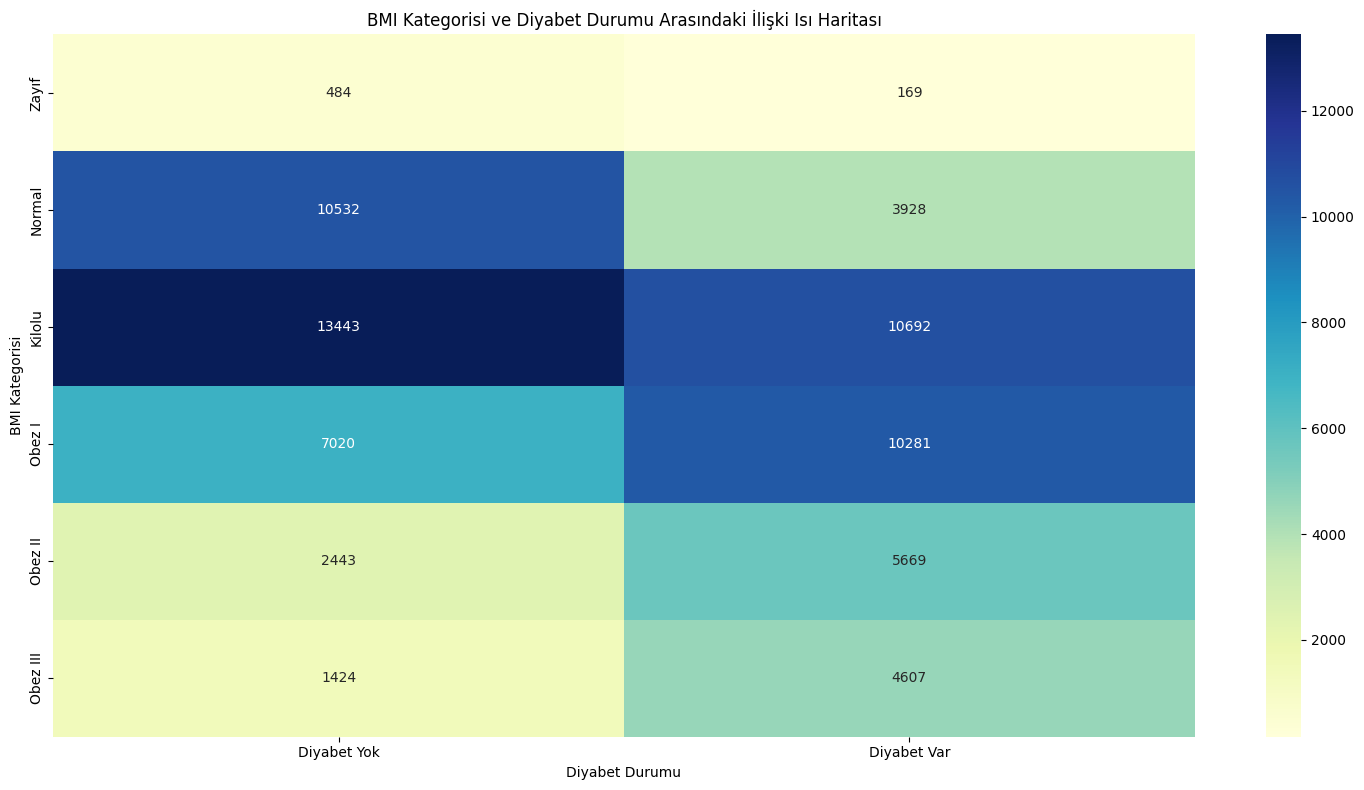

In [132]:
contingency_table_bmi = pd.crosstab(
    df['BMI'],
    df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet Var'})
).sort_index()  # BMI sırasına göre garanti sıralama

# Etiketler
bmi_labels = ['Zayıf', 'Normal', 'Kilolu', 'Obez I', 'Obez II', 'Obez III']

# Heatmap çizimi
plt.figure(figsize=(15, 8))
sns.heatmap(contingency_table_bmi, annot=True, cmap='YlGnBu', fmt='d', cbar=True)
plt.title('BMI Kategorisi ve Diyabet Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Diyabet Durumu')
plt.ylabel('BMI Kategorisi')
plt.yticks(ticks=[i + 0.5 for i in range(len(bmi_labels))], labels=bmi_labels, fontsize=10)  # +0.5 hizalama için
plt.tight_layout()
plt.show()


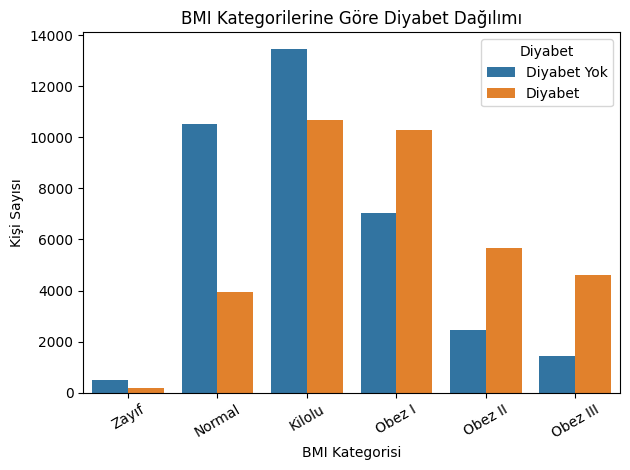

In [133]:
# BMI kategorilerini etiketle
bmi_labels = {
    0: 'Zayıf', 
    1: 'Normal', 
    2: 'Kilolu', 
    3: 'Obez I', 
    4: 'Obez II', 
    5: 'Obez III'
}

# Doğru sırayla çizmek için sıralı etiket listesi
ordered_labels = [bmi_labels[i] for i in sorted(bmi_labels.keys())]

# Çizim
sns.countplot(
    data=df, 
    x=df['BMI'].map(bmi_labels), 
    hue=df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'}),
    order=ordered_labels
)

plt.title('BMI Kategorilerine Göre Diyabet Dağılımı')
plt.xlabel('BMI Kategorisi')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Diyabet')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


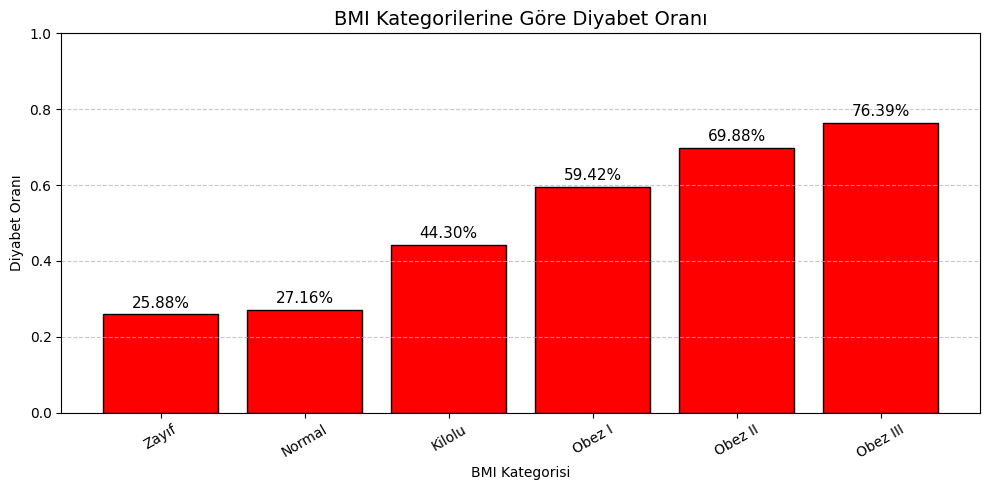

In [134]:
# BMI kategorilerini etiketle
bmi_labels = {
    0: 'Zayıf', 
    1: 'Normal', 
    2: 'Kilolu', 
    3: 'Obez I', 
    4: 'Obez II', 
    5: 'Obez III'
}

# Her kategori için hipertansiyon oranını hesapla
bmi_rates = []
for code in sorted(bmi_labels.keys()):
    total = len(df[df['BMI'] == code])
    bmi_diabet = len(df[(df['BMI'] == code) & (df['Diabetes'] == 1)])
    rate = bmi_diabet / total if total != 0 else 0
    bmi_rates.append(rate)

# Etiket sırası
labels = [bmi_labels[i] for i in sorted(bmi_labels.keys())]

# Grafik çizimi
plt.figure(figsize=(10, 5))
bars = plt.bar(labels, bmi_rates, color='red', edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=11)

plt.title('BMI Kategorilerine Göre Diyabet Oranı', fontsize=14)
plt.xlabel('BMI Kategorisi')
plt.ylabel('Diyabet Oranı')
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.2 Diyabet Durumuna Göre Genel Sağlık Durumu (GenHlth) Dağılımı


Bu grafik, bireylerin kendi değerlendirmelerine göre verdikleri genel sağlık puanlarının (1 = Mükemmel, 5 = Kötü) diyabet durumuna göre nasıl değiştiğini göstermektedir.


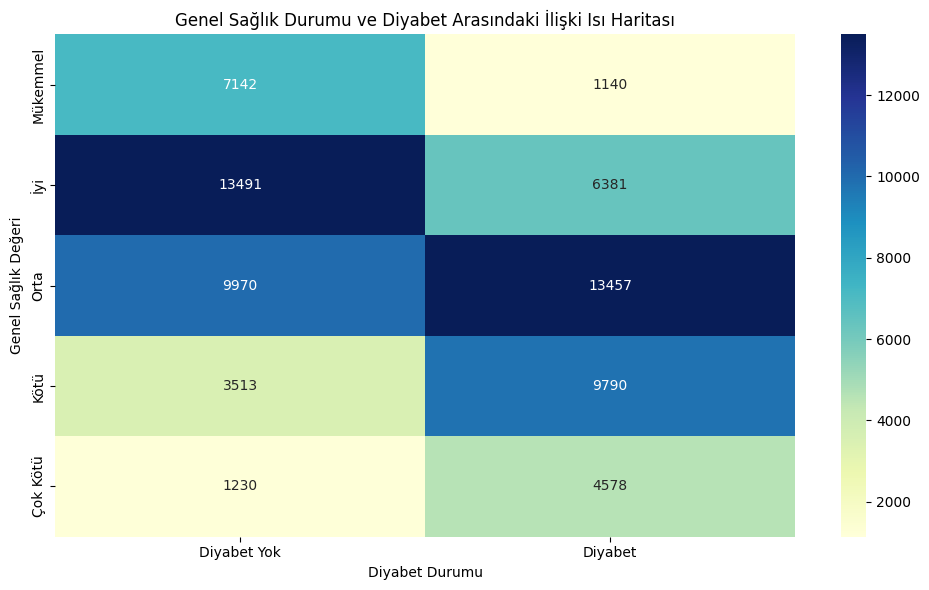

In [135]:
contingency_table = pd.crosstab(
    df['GenHlth'], 
    df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'})
).sort_index()

# GenHlth etiketleri
genhlth_labels = ['Mükemmel', 'İyi', 'Orta', 'Kötü', 'Çok Kötü']

# Isı haritası çizimi
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d', cbar=True)

plt.title('Genel Sağlık Durumu ve Diyabet Arasındaki İlişki Isı Haritası')
plt.xlabel('Diyabet Durumu')
plt.ylabel('Genel Sağlık Değeri')
plt.yticks(ticks=[i + 0.5 for i in range(len(genhlth_labels))], labels=genhlth_labels, fontsize=10)

plt.tight_layout()
plt.show()


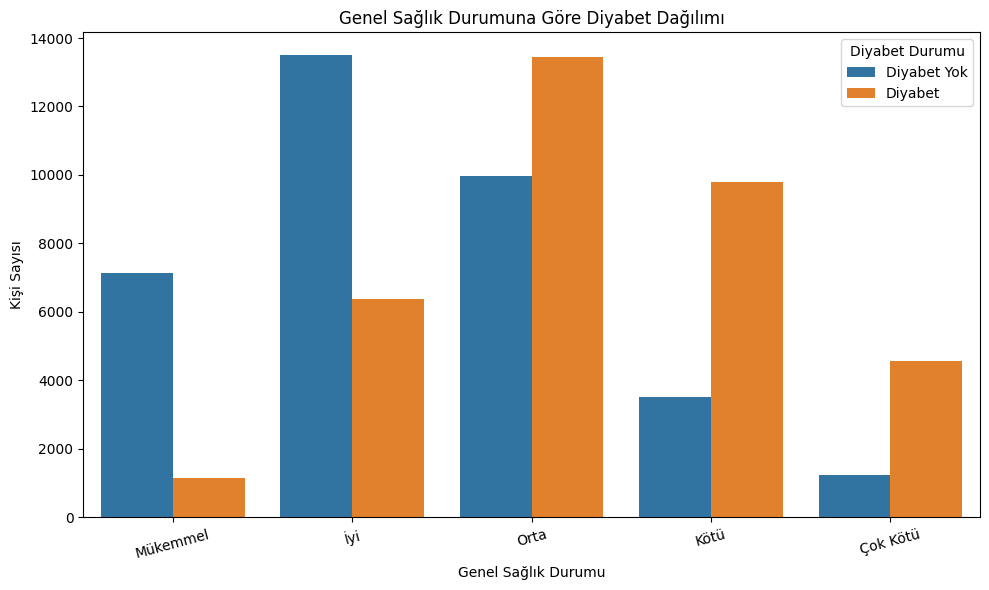

In [136]:
# Genel sağlık durumu etiketleri
genhlth_labels = {
    1: 'Mükemmel',
    2: 'İyi',
    3: 'Orta',
    4: 'Kötü',
    5: 'Çok Kötü'
}

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x=df['GenHlth'].map(genhlth_labels),
    hue=df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'}),
    order=[genhlth_labels[i] for i in sorted(genhlth_labels.keys())]
)

plt.title('Genel Sağlık Durumuna Göre Diyabet Dağılımı')
plt.xlabel('Genel Sağlık Durumu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Diyabet Durumu')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


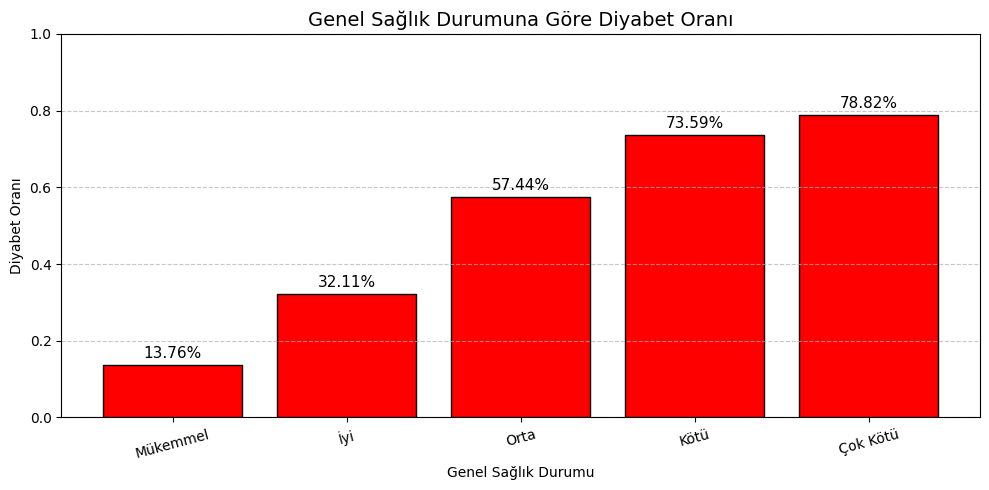

In [137]:
genhlth_labels = {
    1: 'Mükemmel',
    2: 'İyi',
    3: 'Orta',
    4: 'Kötü',
    5: 'Çok Kötü'
}

genhlth_rates = []
for code in sorted(genhlth_labels.keys()):
    total = len(df[df['GenHlth'] == code])
    diabetes_rate = len(df[(df['GenHlth'] == code) & (df['Diabetes'] == 1)])
    rate = diabetes_rate / total if total != 0 else 0
    genhlth_rates.append(rate)

# Etiket sırası
labels = [genhlth_labels[i] for i in sorted(genhlth_labels.keys())]

# Grafik çizimi
plt.figure(figsize=(10, 5))
bars = plt.bar(labels, genhlth_rates, color='red', edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=11)

plt.title('Genel Sağlık Durumuna Göre Diyabet Oranı', fontsize=14)
plt.xlabel('Genel Sağlık Durumu')
plt.ylabel('Diyabet Oranı')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.3 Diyabet Durumuna Göre Yaş Dağılımı



Bu kutu grafikte, bireylerin yaşlarını temsil eden Age değişkeninin, diyabet hastalığına göre dağılımı analiz edilmiştir. Yaş değişkeni 1–13 arası kategorik kodlarla temsil edilmektedir:

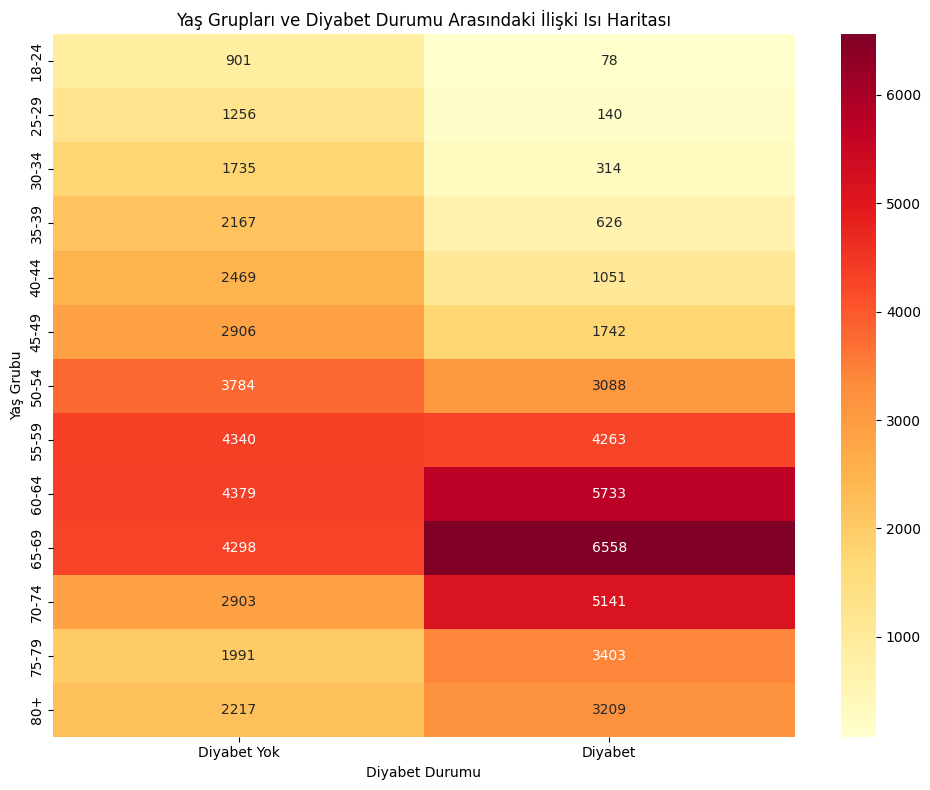

In [138]:
# Yaş etiketlerini tanımla (örnek)
age_labels = {
    1: '18-24',
    2: '25-29',
    3: '30-34',
    4: '35-39',
    5: '40-44',
    6: '45-49',
    7: '50-54',
    8: '55-59',
    9: '60-64',
    10: '65-69',
    11: '70-74',
    12: '75-79',
    13: '80+'
}

# Crosstab ve sıralı hale getir
contingency_table = pd.crosstab(
    df['Age'].map(age_labels),
    df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'})
)

# Çizim
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='YlOrRd', fmt='d', cbar=True)
plt.title('Yaş Grupları ve Diyabet Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Diyabet Durumu')
plt.ylabel('Yaş Grubu')
plt.tight_layout()
plt.show()


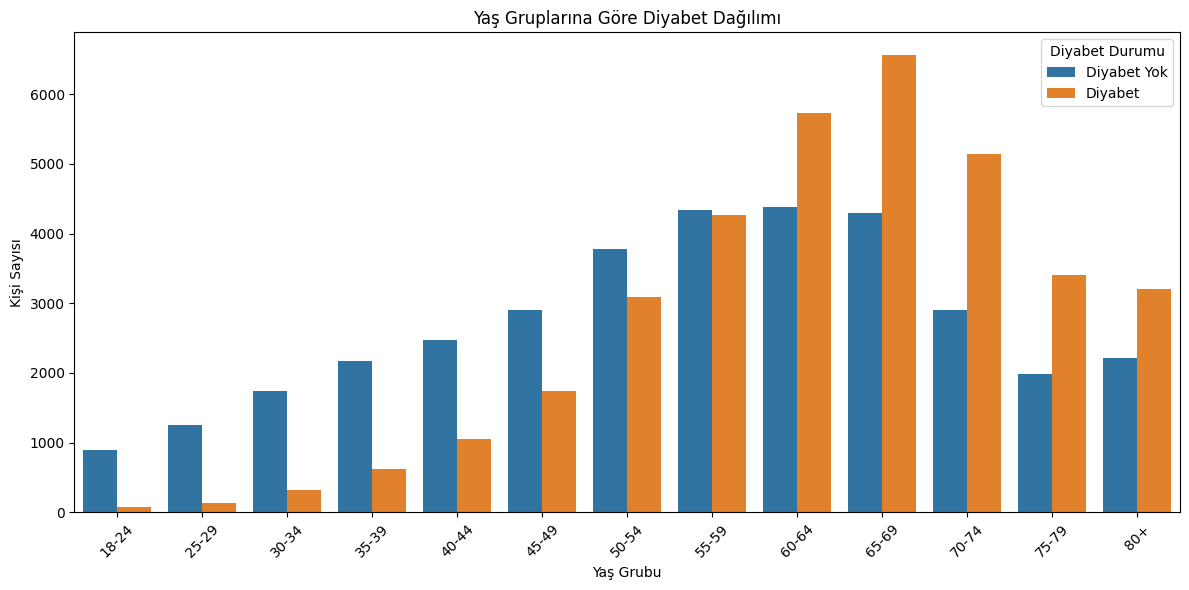

In [139]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x=df['Age'].map(age_labels),
    hue=df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'})
)

plt.title('Yaş Gruplarına Göre Diyabet Dağılımı')
plt.xlabel('Yaş Grubu')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=45)
plt.legend(title='Diyabet Durumu')
plt.tight_layout()
plt.show()


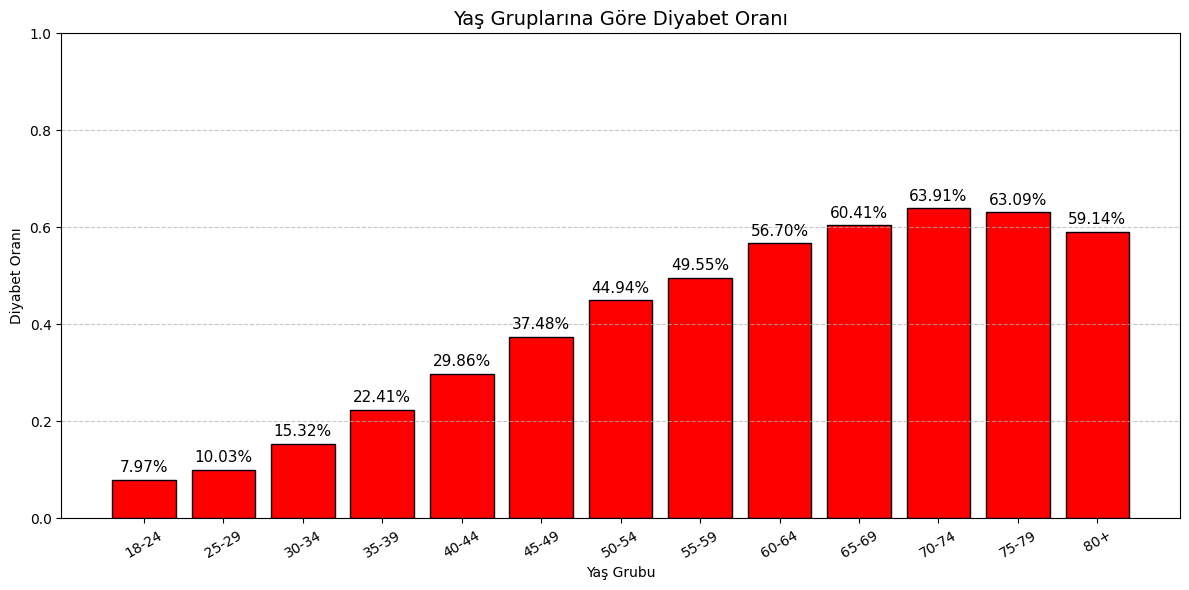

In [140]:
# Yaş grubu etiketleri
age_labels = {
    1: '18-24',
    2: '25-29',
    3: '30-34',
    4: '35-39',
    5: '40-44',
    6: '45-49',
    7: '50-54',
    8: '55-59',
    9: '60-64',
    10: '65-69',
    11: '70-74',
    12: '75-79',
    13: '80+'
}

# Her yaş kategorisi için diyabet oranını hesapla
age_rates = []
for code in sorted(age_labels.keys()):
    total = len(df[df['Age'] == code])
    diabetic = len(df[(df['Age'] == code) & (df['Diabetes'] == 1)])
    rate = diabetic / total if total != 0 else 0
    age_rates.append(rate)

# Etiketleri sıraya koy
labels = [age_labels[i] for i in sorted(age_labels.keys())]

# Grafik çizimi
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, age_rates, color='red', edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=11)

plt.title('Yaş Gruplarına Göre Diyabet Oranı', fontsize=14)
plt.xlabel('Yaş Grubu')
plt.ylabel('Diyabet Oranı')
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.4 Cinsiyet ve Diyabet Durumu Arasındaki İlişki

Bu ısı haritası, bireylerin cinsiyetine göre diyabet durumlarının nasıl dağıldığını göstermektedir. Görselleştirilen veri, pd.crosstab() ile hazırlanmış sıklık tablosuna dayanmaktadır:

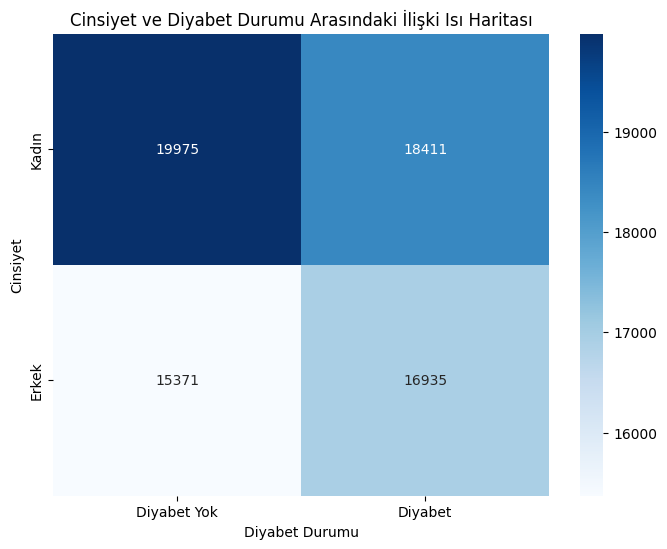

In [141]:
# Cinsiyet ve diyabet arasındaki ilişkiyi görselleştirmek için bir ısı haritası oluştur
contingency_table = pd.crosstab(df['Sex'].map({0: 'Kadın', 1: 'Erkek'}),
                                df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Cinsiyet ve Diyabet Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Diyabet Durumu')
plt.ylabel('Cinsiyet')
plt.show()

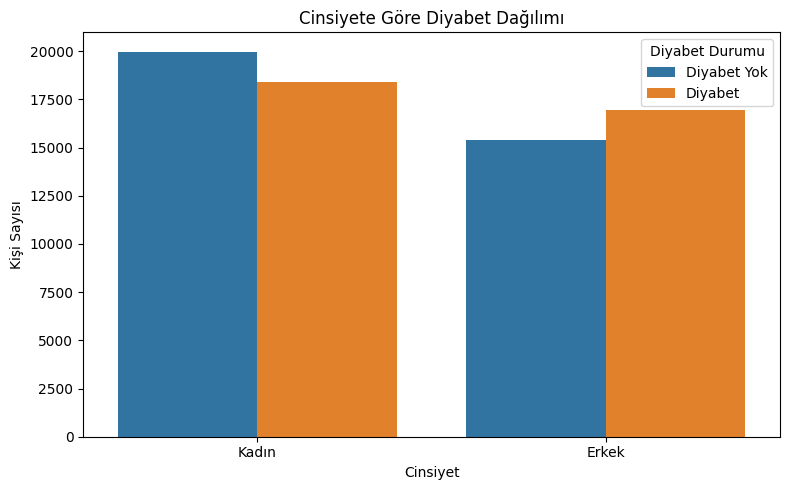

In [142]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x=df['Sex'].map({0: 'Kadın', 1: 'Erkek'}),
    hue=df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'})
)

plt.title('Cinsiyete Göre Diyabet Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Diyabet Durumu')
plt.tight_layout()
plt.show()


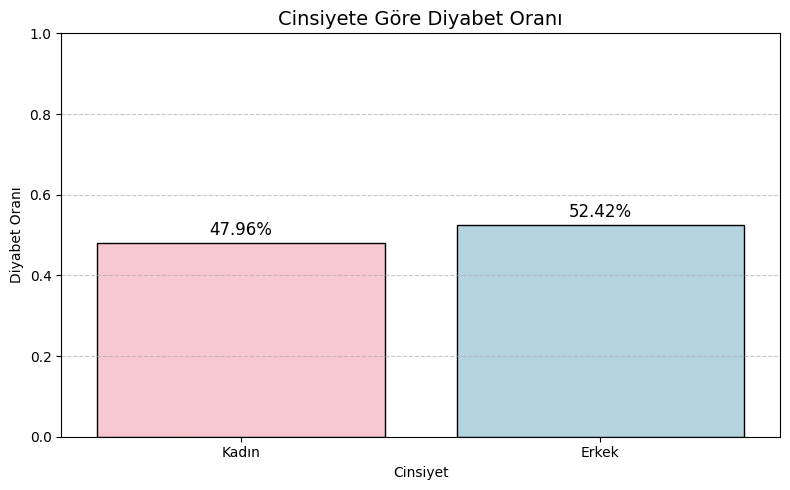

In [143]:
Diabetes_female = len(df[(df['Sex'] == 0) & (df['Diabetes'] == 1)])
Total_female = len(df[df['Sex'] == 0])

Diabetes_male = len(df[(df['Sex'] == 1) & (df['Diabetes'] == 1)])
Total_male = len(df[df['Sex'] == 1])

Rate_female = Diabetes_female / Total_female if Total_female != 0 else 0
Rate_male = Diabetes_male / Total_male if Total_male != 0 else 0

# Veri çerçevesi
labels = ['Kadın', 'Erkek']
rates = [Rate_female, Rate_male]
df_plot = pd.DataFrame({'Cinsiyet': labels, 'Diyabet Oranı': rates})

# Barplot çizimi
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_plot,
    x='Cinsiyet',
    y='Diyabet Oranı',
    hue='Cinsiyet',
    palette=['pink', 'lightblue'],
    edgecolor='black',
    legend=False
)

# Yüzdelik etiketler
for index, row in df_plot.iterrows():
    plt.text(index, row['Diyabet Oranı'] + 0.01,
             f"{row['Diyabet Oranı']:.2%}", ha='center', va='bottom', fontsize=12)

plt.title('Cinsiyete Göre Diyabet Oranı', fontsize=14)
plt.ylabel('Diyabet Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.5 Yüksek Kolesterol ve Diyabet Durumu Arasındaki İlişki

Bu ısı haritası, bireylerin yüksek kolesterol durumları ile diyabet varlığı arasındaki dağılımı karşılaştırır. 

Görselleştirilen veri, HighChol (0: Yok, 1: Var) ile Diabetes (0: Yok, 1: Var) değişkenlerinin çapraz tablosudur:

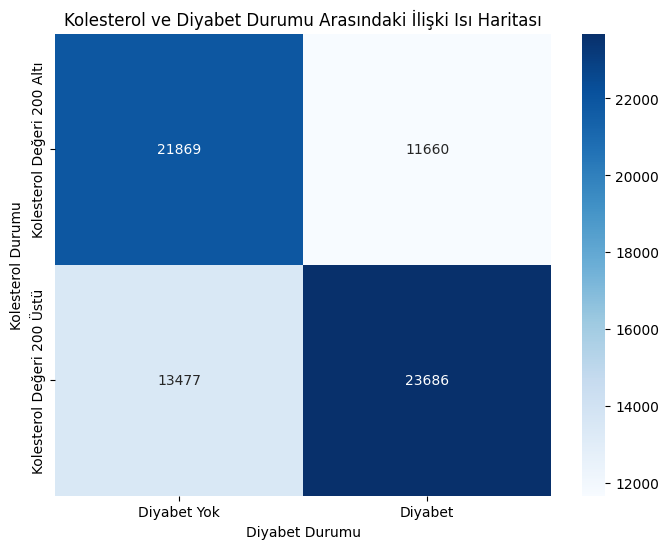

In [144]:
# Yüksek kolesterol ve diyabet arasındaki ilişkiyi görselleştirmek için bir ısı haritası oluştur
contingency_table = pd.crosstab(df['HighChol'].map({0: 'Kolesterol Değeri 200 Altı', 1: 'Kolesterol Değeri 200 Üstü'}),
                                df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Kolesterol ve Diyabet Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Diyabet Durumu')
plt.ylabel('Kolesterol Durumu')
plt.show()

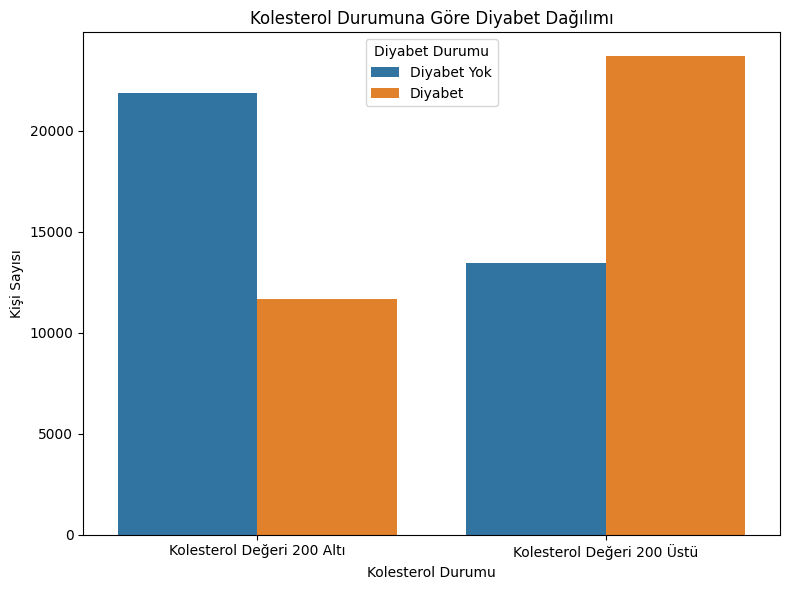

In [145]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x=df['HighChol'].map({0: 'Kolesterol Değeri 200 Altı', 1: 'Kolesterol Değeri 200 Üstü'}),
    hue=df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'})
)

plt.title('Kolesterol Durumuna Göre Diyabet Dağılımı')
plt.xlabel('Kolesterol Durumu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Diyabet Durumu')
plt.tight_layout()
plt.show()


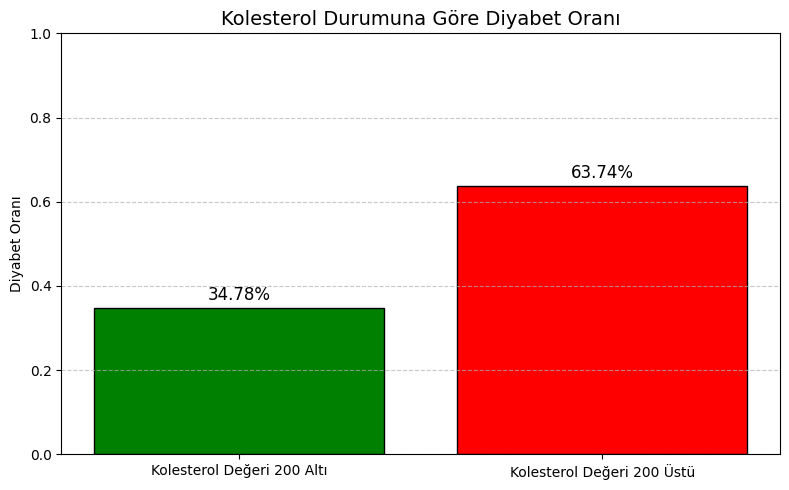

In [146]:
# HighChol (yüksek kolesterol) değerine göre diyabet oranlarını hesapla
Diabetes_low_chol = len(df[(df['HighChol'] == 0) & (df['Diabetes'] == 1)])
Total_low_chol = len(df[df['HighChol'] == 0])

Diabetes_high_chol = len(df[(df['HighChol'] == 1) & (df['Diabetes'] == 1)])
Total_high_chol = len(df[df['HighChol'] == 1])

Rate_low_chol = Diabetes_low_chol / Total_low_chol if Total_low_chol != 0 else 0
Rate_high_chol = Diabetes_high_chol / Total_high_chol if Total_high_chol != 0 else 0

# Grafik verileri
labels = ['Kolesterol Değeri 200 Altı','Kolesterol Değeri 200 Üstü']
rates = [Rate_low_chol, Rate_high_chol]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Kolesterol Durumuna Göre Diyabet Oranı', fontsize=14)
plt.ylabel('Diyabet Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.6 Yüksek Tansiyon ve Diyabet Durumu Arasındaki İlişki

Bu ısı haritası, bireylerin yüksek tansiyon geçmişi ile diyabet durumu arasındaki dağılımı karşılaştırır. HighBP sütunu 1 ise bireyin yüksek tansiyonu vardır.

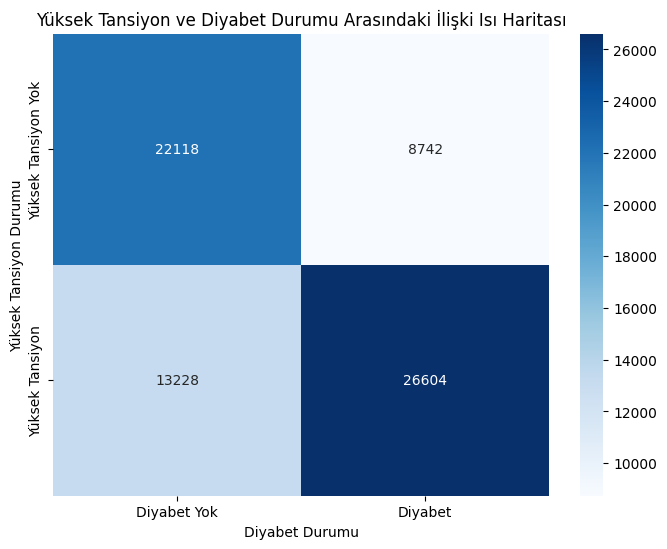

In [147]:
# Yüksek tansiyon ve diyabet arasındaki ilişkiyi görselleştirmek için bir ısı haritası oluştur
contingency_table = pd.crosstab(df['HighBP'].map({0: 'Yüksek Tansiyon Yok', 1: 'Yüksek Tansiyon'}),
                                df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Yüksek Tansiyon ve Diyabet Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Diyabet Durumu')
plt.ylabel('Yüksek Tansiyon Durumu')
plt.show()

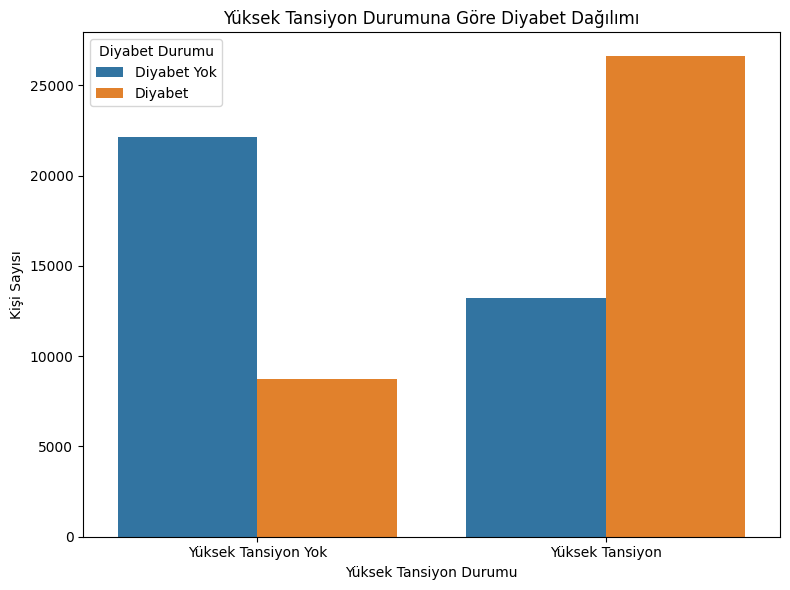

In [148]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x=df['HighBP'].map({0: 'Yüksek Tansiyon Yok', 1: 'Yüksek Tansiyon'}),
    hue=df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'})
)

plt.title('Yüksek Tansiyon Durumuna Göre Diyabet Dağılımı')
plt.xlabel('Yüksek Tansiyon Durumu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Diyabet Durumu')
plt.tight_layout()
plt.show()


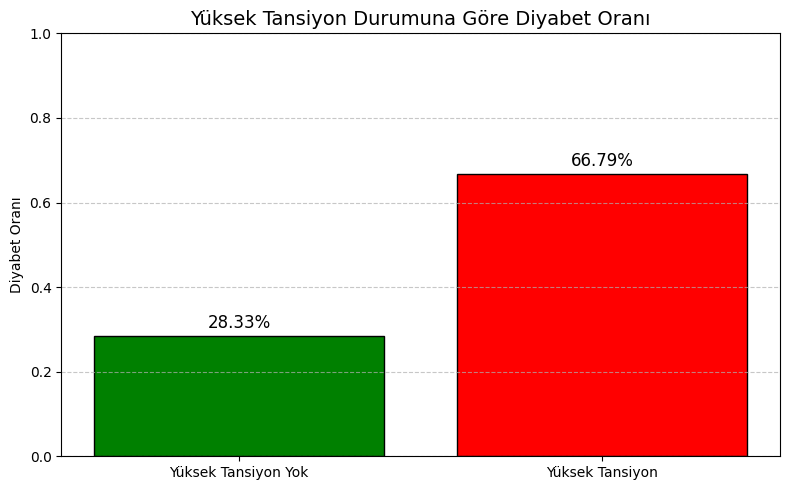

In [149]:
Diabetes_no_bp = len(df[(df['HighBP'] == 0) & (df['Diabetes'] == 1)])
Total_no_bp = len(df[df['HighBP'] == 0])

Diabetes_yes_bp = len(df[(df['HighBP'] == 1) & (df['Diabetes'] == 1)])
Total_yes_bp = len(df[df['HighBP'] == 1])

Rate_no_bp = Diabetes_no_bp / Total_no_bp if Total_no_bp != 0 else 0
Rate_yes_bp = Diabetes_yes_bp / Total_yes_bp if Total_yes_bp != 0 else 0

# Grafik verileri
labels = ['Yüksek Tansiyon Yok', 'Yüksek Tansiyon']
rates = [Rate_no_bp, Rate_yes_bp]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Yüksek Tansiyon Durumuna Göre Diyabet Oranı', fontsize=14)
plt.ylabel('Diyabet Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.7 Kalp Hastalığı/Krizi ve Diyabet Durumu Arasındaki İlişki

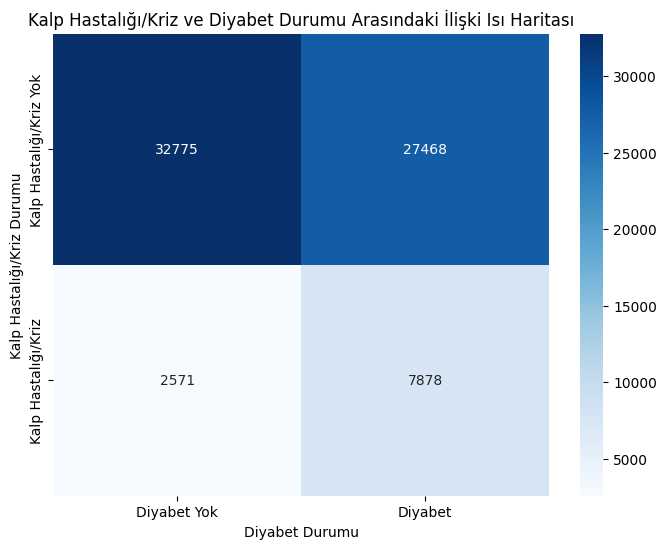

In [150]:
# Kalp hastalığı/krizi ve diyabet arasındaki ilişkiyi görselleştirmek için bir ısı haritası oluştur
contingency_table = pd.crosstab(df['HeartDiseaseorAttack'].map({0: 'Kalp Hastalığı/Kriz Yok', 1: 'Kalp Hastalığı/Kriz'}),
                                df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Kalp Hastalığı/Kriz ve Diyabet Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Diyabet Durumu')
plt.ylabel('Kalp Hastalığı/Kriz Durumu')
plt.show()

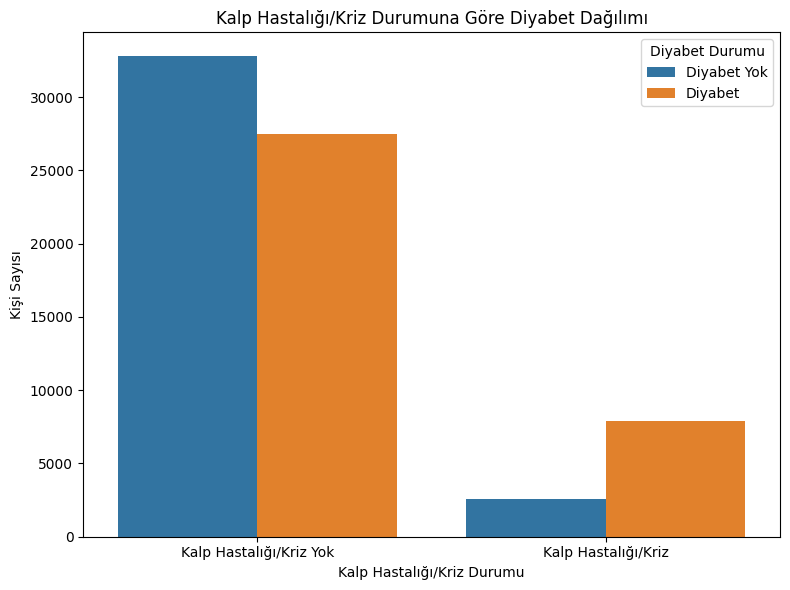

In [151]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x=df['HeartDiseaseorAttack'].map({0: 'Kalp Hastalığı/Kriz Yok', 1: 'Kalp Hastalığı/Kriz'}),
    hue=df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'})
)

plt.title('Kalp Hastalığı/Kriz Durumuna Göre Diyabet Dağılımı')
plt.xlabel('Kalp Hastalığı/Kriz Durumu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Diyabet Durumu')
plt.tight_layout()
plt.show()


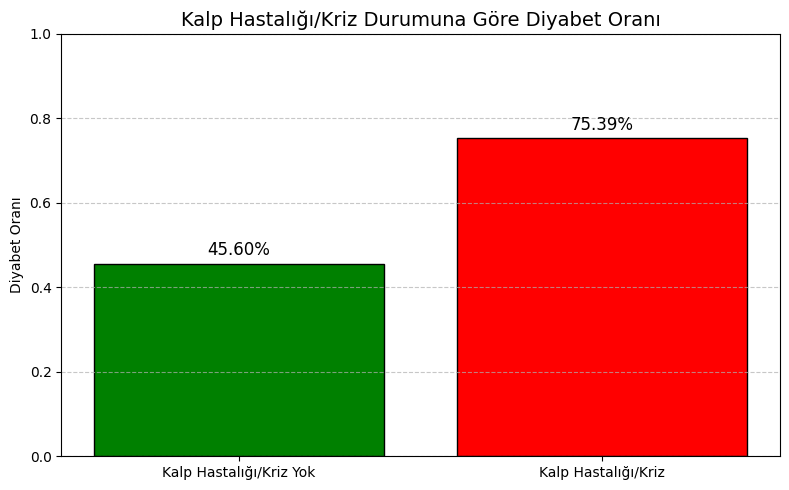

In [152]:
Diabetes_no_heart = len(df[(df['HeartDiseaseorAttack'] == 0) & (df['Diabetes'] == 1)])
Total_no_heart = len(df[df['HeartDiseaseorAttack'] == 0])

Diabetes_yes_heart = len(df[(df['HeartDiseaseorAttack'] == 1) & (df['Diabetes'] == 1)])
Total_yes_heart = len(df[df['HeartDiseaseorAttack'] == 1])

Rate_no_heart = Diabetes_no_heart / Total_no_heart if Total_no_heart != 0 else 0
Rate_yes_heart = Diabetes_yes_heart / Total_yes_heart if Total_yes_heart != 0 else 0

# Grafik verileri
labels = ['Kalp Hastalığı/Kriz Yok', 'Kalp Hastalığı/Kriz']
rates = [Rate_no_heart, Rate_yes_heart]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Kalp Hastalığı/Kriz Durumuna Göre Diyabet Oranı', fontsize=14)
plt.ylabel('Diyabet Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.8 İnme ve Diyabet Arasındaki İlişki

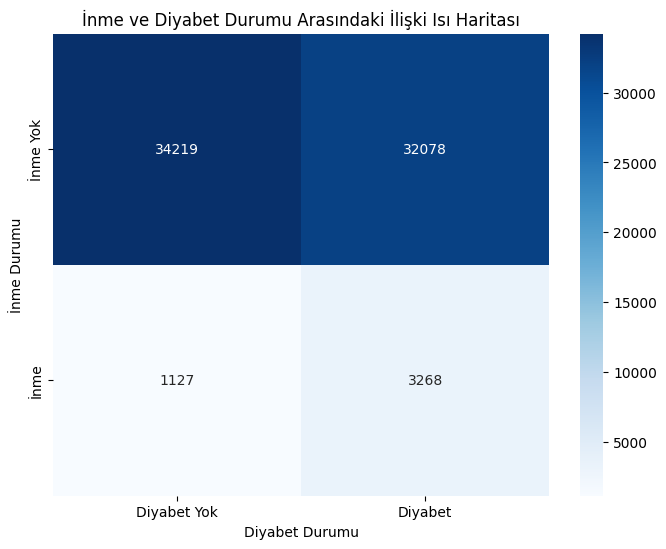

In [153]:
# İnme ve diyabet arasındaki ilişkiyi görselleştirmek için bir ısı haritası oluştur
contingency_table = pd.crosstab(df['Stroke'].map({0: 'İnme Yok', 1: 'İnme'}),
                                df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('İnme ve Diyabet Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Diyabet Durumu')
plt.ylabel('İnme Durumu')
plt.show()

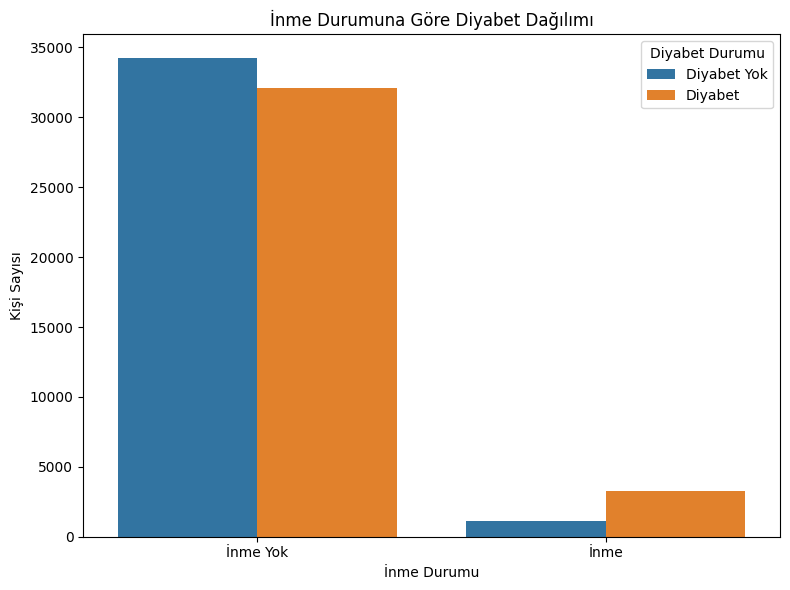

In [154]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x=df['Stroke'].map({0: 'İnme Yok', 1: 'İnme'}),
    hue=df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'})
)

plt.title('İnme Durumuna Göre Diyabet Dağılımı')
plt.xlabel('İnme Durumu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Diyabet Durumu')
plt.tight_layout()
plt.show()


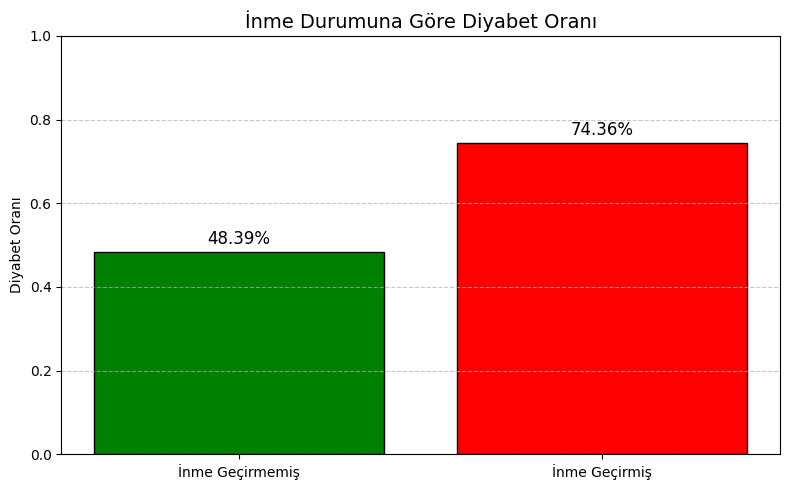

In [155]:
diabetes_no_stroke = len(df[(df['Stroke'] == 0) & (df['Diabetes'] == 1)])
total_no_stroke = len(df[df['Stroke'] == 0])

diabetes_yes_stroke = len(df[(df['Stroke'] == 1) & (df['Diabetes'] == 1)])
total_yes_stroke = len(df[df['Stroke'] == 1])

rate_no_stroke = diabetes_no_stroke / total_no_stroke if total_no_stroke != 0 else 0
rate_yes_stroke = diabetes_yes_stroke / total_yes_stroke if total_yes_stroke != 0 else 0

# Grafik verileri
labels = ['İnme Geçirmemiş', 'İnme Geçirmiş']
rates = [rate_no_stroke, rate_yes_stroke]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('İnme Durumuna Göre Diyabet Oranı', fontsize=14)
plt.ylabel('Diyabet Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.9 Yürüme veya Merdiven Çıkma Zorluğu ve Diyabet Durumu Arasındaki İlişki

Bu ısı haritası, bireylerin hareket kabiliyeti (özellikle yürümek veya merdiven çıkmakta zorluk yaşayıp yaşamadıkları) ile diyabet arasında bir ilişki olup olmadığını incelemektedir.

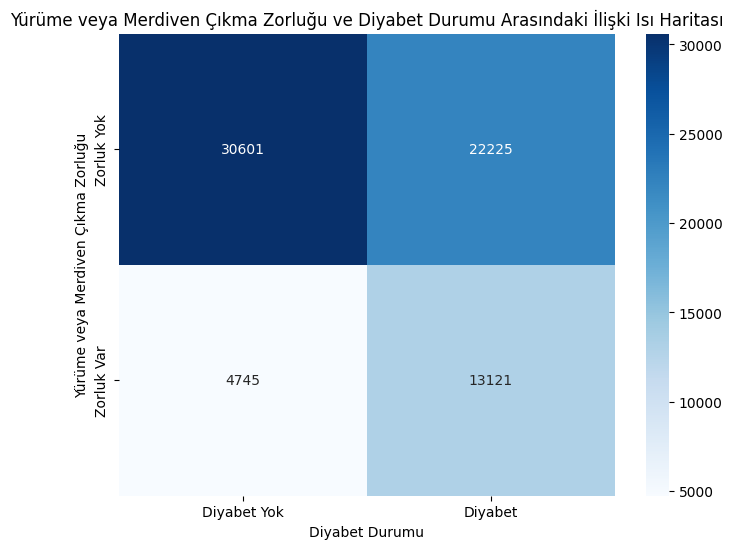

In [156]:
# Yürüme veya merdiven çıkma zorluğu ile diyabet arasındaki ilişkiyi görselleştirmek için bir ısı haritası oluştur
contingency_table = pd.crosstab(df['DiffWalk'].map({0: 'Zorluk Yok', 1: 'Zorluk Var'}),
                                df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Yürüme veya Merdiven Çıkma Zorluğu ve Diyabet Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Diyabet Durumu')
plt.ylabel('Yürüme veya Merdiven Çıkma Zorluğu')
plt.show()

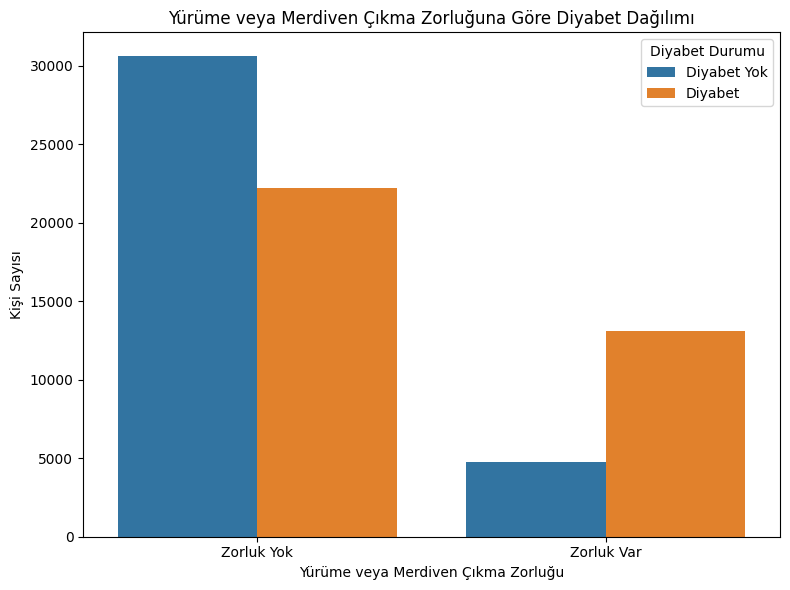

In [157]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x=df['DiffWalk'].map({0: 'Zorluk Yok', 1: 'Zorluk Var'}),
    hue=df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'})
)

plt.title('Yürüme veya Merdiven Çıkma Zorluğuna Göre Diyabet Dağılımı')
plt.xlabel('Yürüme veya Merdiven Çıkma Zorluğu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Diyabet Durumu')
plt.tight_layout()
plt.show()


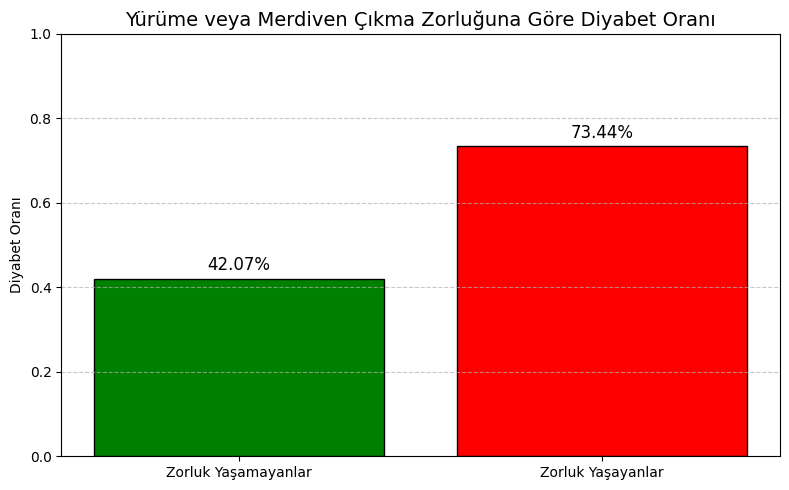

In [158]:
diabetes_no_diff = len(df[(df['DiffWalk'] == 0) & (df['Diabetes'] == 1)])
total_no_diff = len(df[df['DiffWalk'] == 0])

diabetes_yes_diff = len(df[(df['DiffWalk'] == 1) & (df['Diabetes'] == 1)])
total_yes_diff = len(df[df['DiffWalk'] == 1])

rate_no_diff = diabetes_no_diff / total_no_diff if total_no_diff != 0 else 0
rate_yes_diff = diabetes_yes_diff / total_yes_diff if total_yes_diff != 0 else 0

# Grafik verileri
labels = ['Zorluk Yaşamayanlar', 'Zorluk Yaşayanlar']
rates = [rate_no_diff, rate_yes_diff]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Yürüme veya Merdiven Çıkma Zorluğuna Göre Diyabet Oranı', fontsize=14)
plt.ylabel('Diyabet Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.10 Sigara Kullanımı ve Diyabet Durumu Arasındaki İlişki

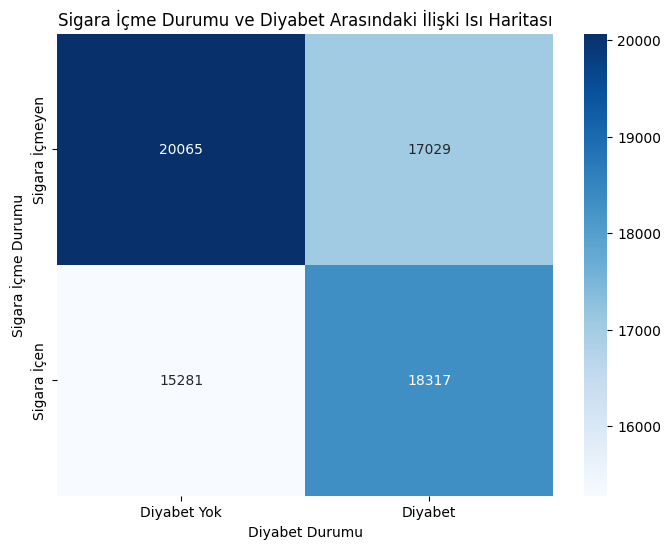

In [159]:
# Sigara içme durumu ile diyabet arasındaki ilişkiyi görselleştirmek için bir ısı haritası oluştur
contingency_table_smoker = pd.crosstab(df['Smoker'].map({0: 'Sigara İçmeyen', 1: 'Sigara İçen'}),
                                       df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_smoker, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Sigara İçme Durumu ve Diyabet Arasındaki İlişki Isı Haritası')
plt.xlabel('Diyabet Durumu')
plt.ylabel('Sigara İçme Durumu')
plt.show()

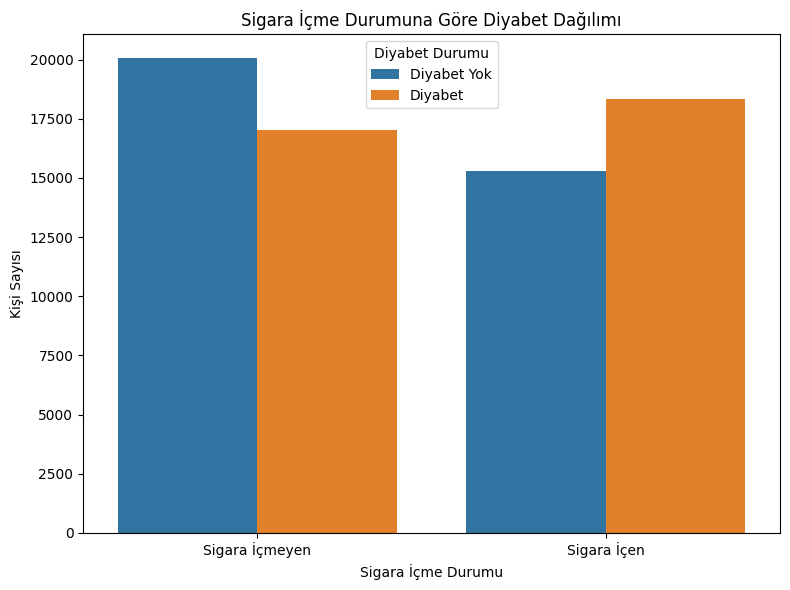

In [160]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x=df['Smoker'].map({0: 'Sigara İçmeyen', 1: 'Sigara İçen'}),
    hue=df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'})
)

plt.title('Sigara İçme Durumuna Göre Diyabet Dağılımı')
plt.xlabel('Sigara İçme Durumu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Diyabet Durumu')
plt.tight_layout()
plt.show()


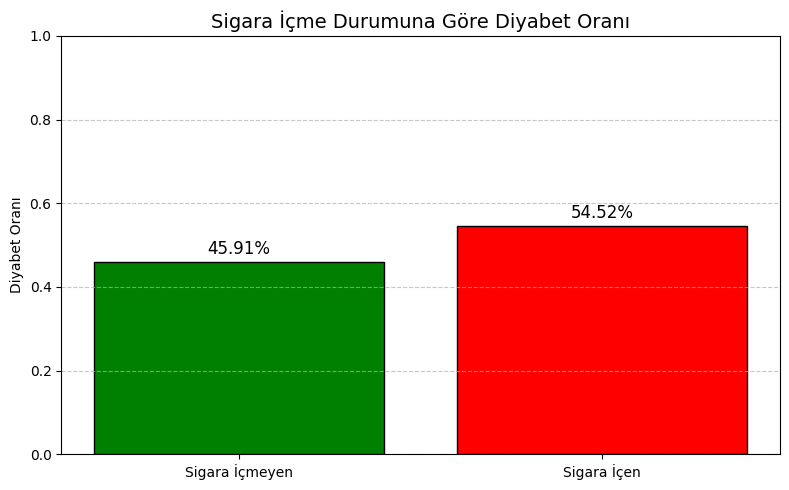

In [161]:
diabetes_nonsmoker = len(df[(df['Smoker'] == 0) & (df['Diabetes'] == 1)])
total_nonsmoker = len(df[df['Smoker'] == 0])

diabetes_smoker = len(df[(df['Smoker'] == 1) & (df['Diabetes'] == 1)])
total_smoker = len(df[df['Smoker'] == 1])

rate_nonsmoker = diabetes_nonsmoker / total_nonsmoker if total_nonsmoker != 0 else 0
rate_smoker = diabetes_smoker / total_smoker if total_smoker != 0 else 0

# Grafik verileri
labels = ['Sigara İçmeyen', 'Sigara İçen']
rates = [rate_nonsmoker, rate_smoker]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Sigara İçme Durumuna Göre Diyabet Oranı', fontsize=14)
plt.ylabel('Diyabet Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.11 Fiziksel Aktivite ve Diyabet Durumu Arasındaki İlişki

Bu ısı haritası, bireylerin son 30 günde iş dışında fiziksel aktivite yapıp yapmadıkları ile diyabet hastalığı arasındaki ilişkiyi gözler önüne serer.

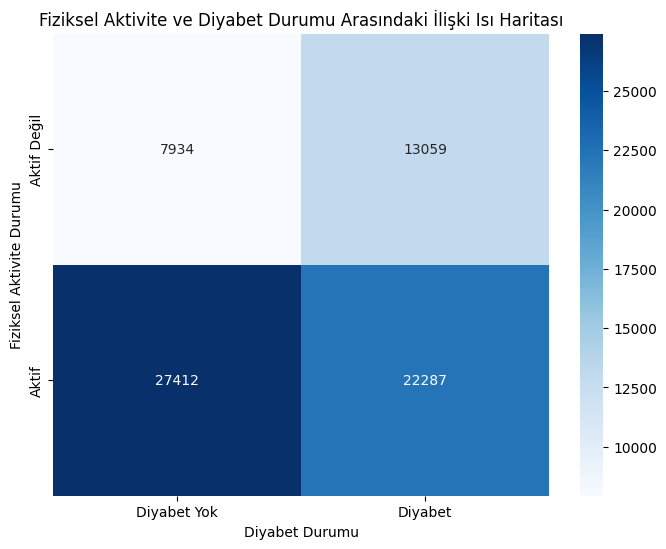

In [162]:
# Fiziksel aktivite durumu ile diyabet arasındaki ilişkiyi görselleştirmek için bir ısı haritası oluştur
contingency_table_phys = pd.crosstab(df['PhysActivity'].map({0: 'Aktif Değil', 1: 'Aktif'}),
                                     df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_phys, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Fiziksel Aktivite ve Diyabet Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Diyabet Durumu')
plt.ylabel('Fiziksel Aktivite Durumu')
plt.show()

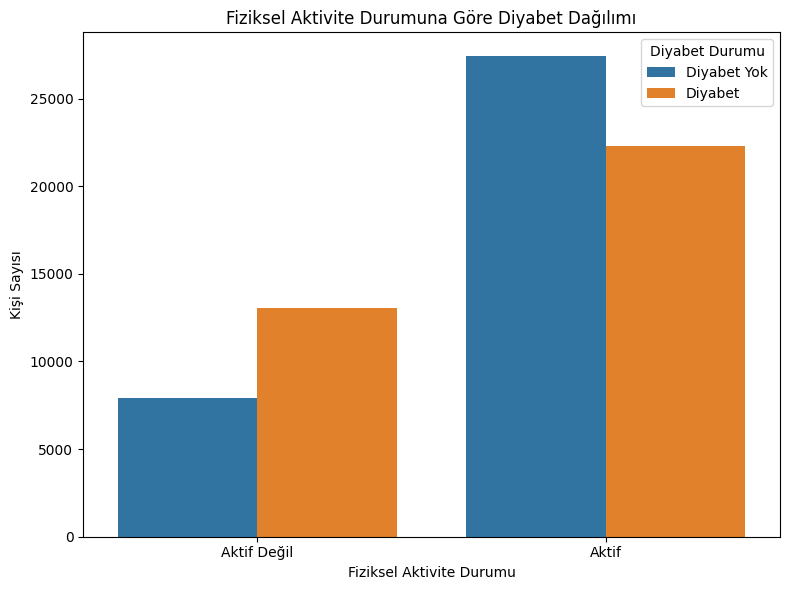

In [163]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x=df['PhysActivity'].map({0: 'Aktif Değil', 1: 'Aktif'}),
    hue=df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'})
)

plt.title('Fiziksel Aktivite Durumuna Göre Diyabet Dağılımı')
plt.xlabel('Fiziksel Aktivite Durumu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Diyabet Durumu')
plt.tight_layout()
plt.show()


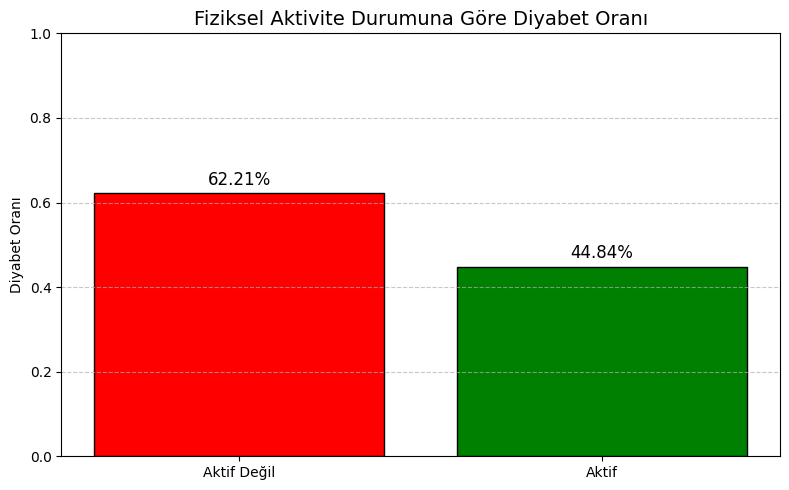

In [164]:
diabetes_inactive = len(df[(df['PhysActivity'] == 0) & (df['Diabetes'] == 1)])
total_inactive = len(df[df['PhysActivity'] == 0])

diabetes_active = len(df[(df['PhysActivity'] == 1) & (df['Diabetes'] == 1)])
total_active = len(df[df['PhysActivity'] == 1])

rate_inactive = diabetes_inactive / total_inactive if total_inactive != 0 else 0
rate_active = diabetes_active / total_active if total_active != 0 else 0

# Grafik verileri
labels = ['Aktif Değil', 'Aktif']
rates = [rate_inactive, rate_active]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['red', 'green'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Fiziksel Aktivite Durumuna Göre Diyabet Oranı', fontsize=14)
plt.ylabel('Diyabet Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.12 Alkol Tüketimi ve Diyabet Durumu Arasındaki İlişki

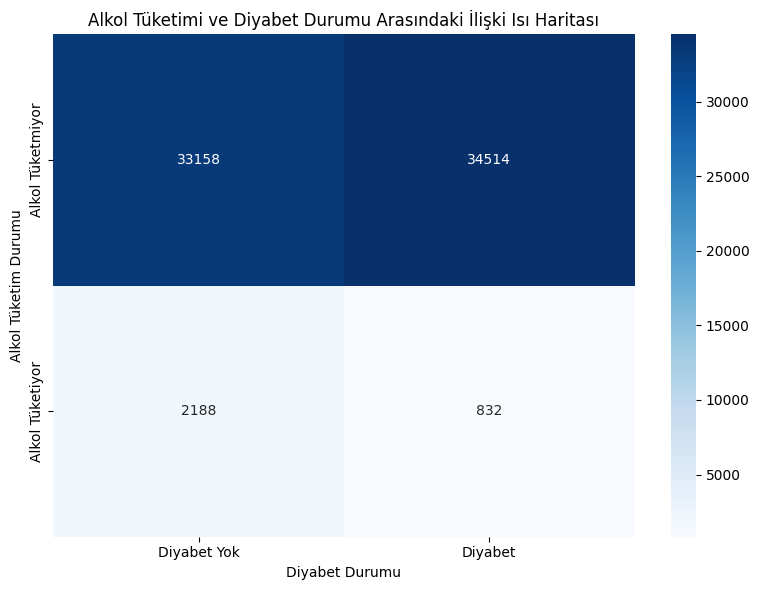

In [165]:
contingency_table_alcohol = pd.crosstab(
    df['HvyAlcoholConsump'].map({0: 'Alkol Tüketmiyor', 1: 'Alkol Tüketiyor'}),
    df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'})
)

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_alcohol, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Alkol Tüketimi ve Diyabet Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Diyabet Durumu')
plt.ylabel('Alkol Tüketim Durumu')
plt.tight_layout()
plt.show()


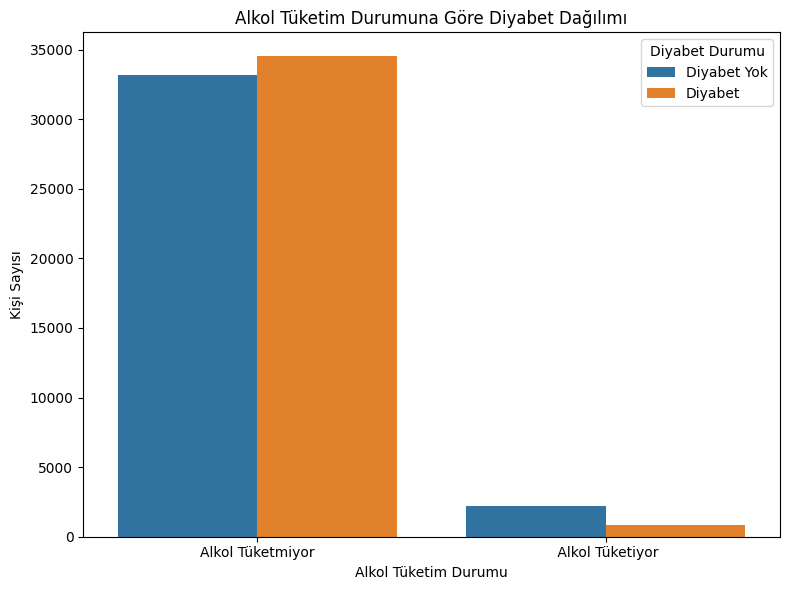

In [166]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x=df['HvyAlcoholConsump'].map({0: 'Alkol Tüketmiyor', 1: ' Alkol Tüketiyor'}),
    hue=df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'})
)

plt.title('Alkol Tüketim Durumuna Göre Diyabet Dağılımı')
plt.xlabel('Alkol Tüketim Durumu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Diyabet Durumu')
plt.tight_layout()
plt.show()


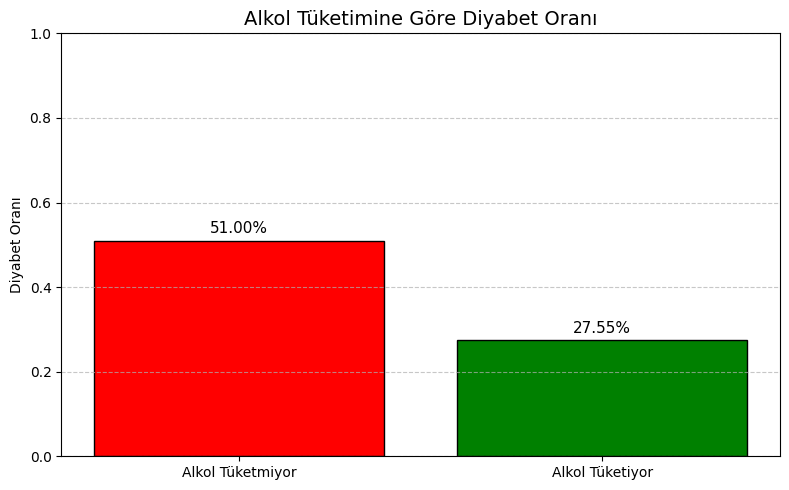

In [167]:
diabetes_non_alcohol = len(df[(df['HvyAlcoholConsump'] == 0) & (df['Diabetes'] == 1)])
total_non_alcohol = len(df[df['HvyAlcoholConsump'] == 0])

diabetes_alcohol = len(df[(df['HvyAlcoholConsump'] == 1) & (df['Diabetes'] == 1)])
total_alcohol = len(df[df['HvyAlcoholConsump'] == 1])

rate_non_alcohol = diabetes_non_alcohol / total_non_alcohol if total_non_alcohol != 0 else 0
rate_alcohol = diabetes_alcohol / total_alcohol if total_alcohol != 0 else 0

# Grafik verileri
labels = ['Alkol Tüketmiyor', 'Alkol Tüketiyor']
rates = [rate_non_alcohol, rate_alcohol]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['red', 'green'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=11)

plt.title('Alkol Tüketimine Göre Diyabet Oranı', fontsize=14)
plt.ylabel('Diyabet Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.13 Meyve Tüketimi ve Diyabet Durumu Arasındaki İlişki

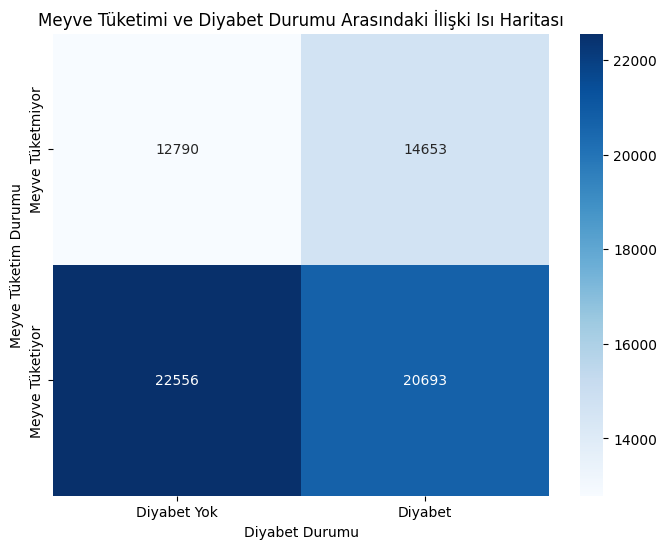

In [168]:
# Meyve tüketimi ile diyabet arasındaki ilişkiyi görselleştirmek için bir ısı haritası oluştur
contingency_table_fruits = pd.crosstab(df['Fruits'].map({0: 'Meyve Tüketmiyor', 1: 'Meyve Tüketiyor'}),
                                       df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_fruits, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Meyve Tüketimi ve Diyabet Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Diyabet Durumu')
plt.ylabel('Meyve Tüketim Durumu')
plt.show()

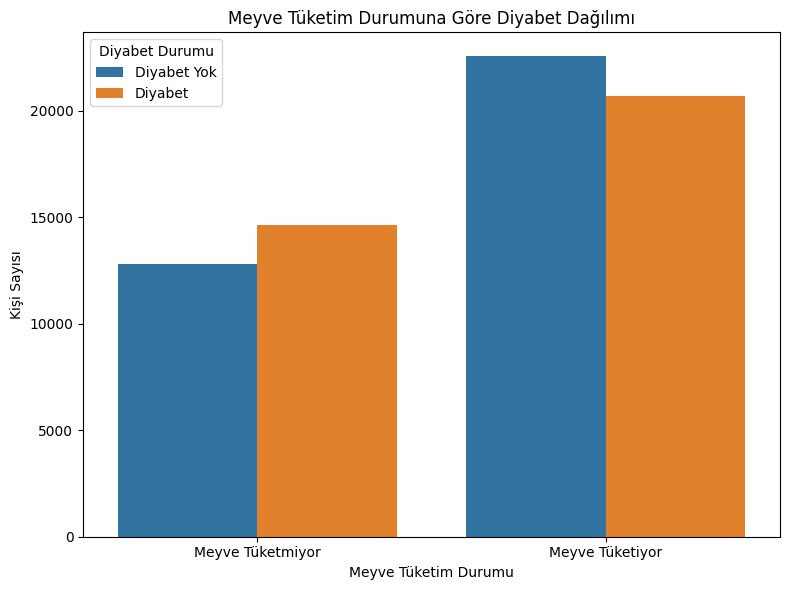

In [169]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x=df['Fruits'].map({0: 'Meyve Tüketmiyor', 1: 'Meyve Tüketiyor'}),
    hue=df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'})
)

plt.title('Meyve Tüketim Durumuna Göre Diyabet Dağılımı')
plt.xlabel('Meyve Tüketim Durumu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Diyabet Durumu')
plt.tight_layout()
plt.show()


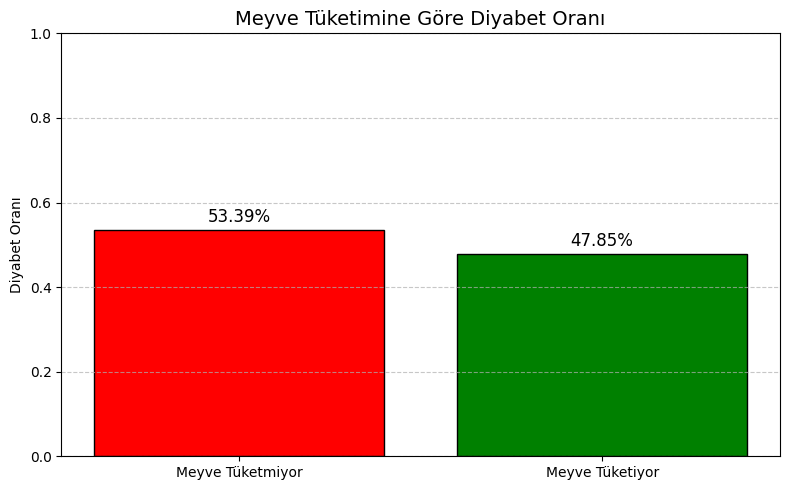

In [171]:
diabetes_no_fruit = len(df[(df['Fruits'] == 0) & (df['Diabetes'] == 1)])
total_no_fruit = len(df[df['Fruits'] == 0])

diabetes_yes_fruit = len(df[(df['Fruits'] == 1) & (df['Diabetes'] == 1)])
total_yes_fruit = len(df[df['Fruits'] == 1])

rate_no_fruit = diabetes_no_fruit / total_no_fruit if total_no_fruit != 0 else 0
rate_yes_fruit = diabetes_yes_fruit / total_yes_fruit if total_yes_fruit != 0 else 0

# Grafik verileri
labels = ['Meyve Tüketmiyor', 'Meyve Tüketiyor']
rates = [rate_no_fruit, rate_yes_fruit]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['red', 'green'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Meyve Tüketimine Göre Diyabet Oranı', fontsize=14)
plt.ylabel('Diyabet Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.14 Sebze Tüketimi ve Diyabet Durumu Arasındaki İlişki

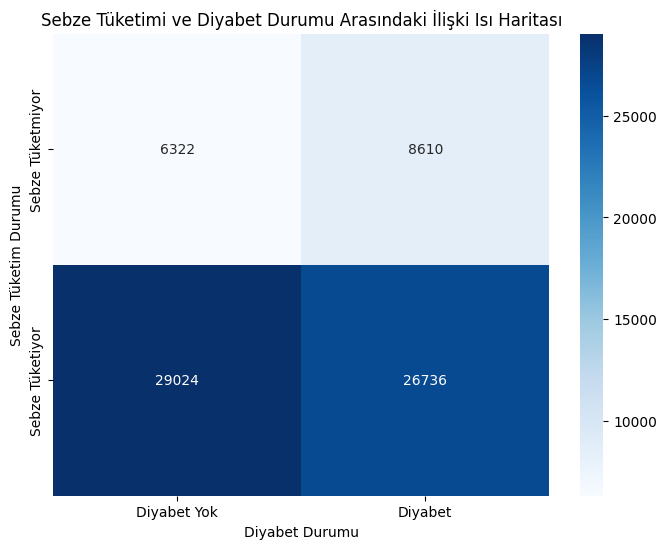

In [172]:
# Sebze tüketimi ile diyabet arasındaki ilişkiyi görselleştirmek için bir ısı haritası oluştur
contingency_table_veggies = pd.crosstab(df['Veggies'].map({0: 'Sebze Tüketmiyor', 1: 'Sebze Tüketiyor'}),
                                        df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_veggies, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Sebze Tüketimi ve Diyabet Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Diyabet Durumu')
plt.ylabel('Sebze Tüketim Durumu')
plt.show()

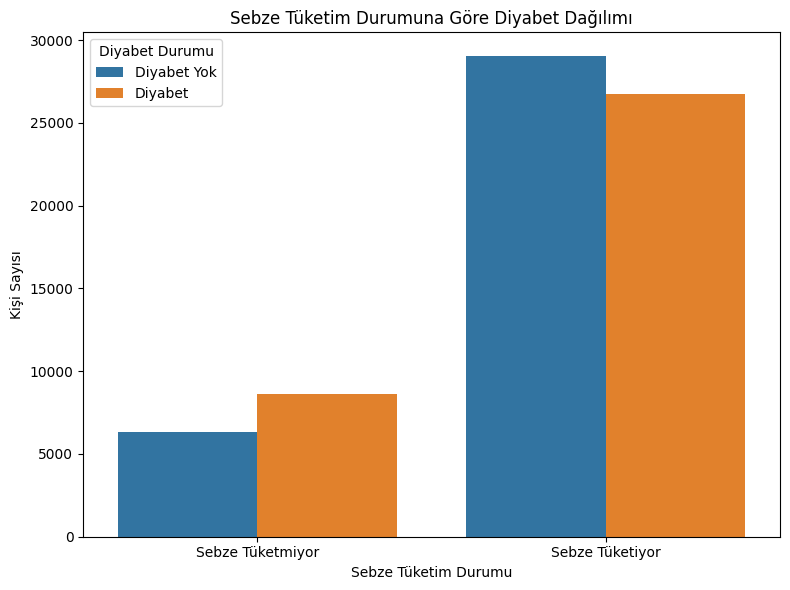

In [173]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x=df['Veggies'].map({0: 'Sebze Tüketmiyor', 1: 'Sebze Tüketiyor'}),
    hue=df['Diabetes'].map({0: 'Diyabet Yok', 1: 'Diyabet'})
)

plt.title('Sebze Tüketim Durumuna Göre Diyabet Dağılımı')
plt.xlabel('Sebze Tüketim Durumu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Diyabet Durumu')
plt.tight_layout()
plt.show()


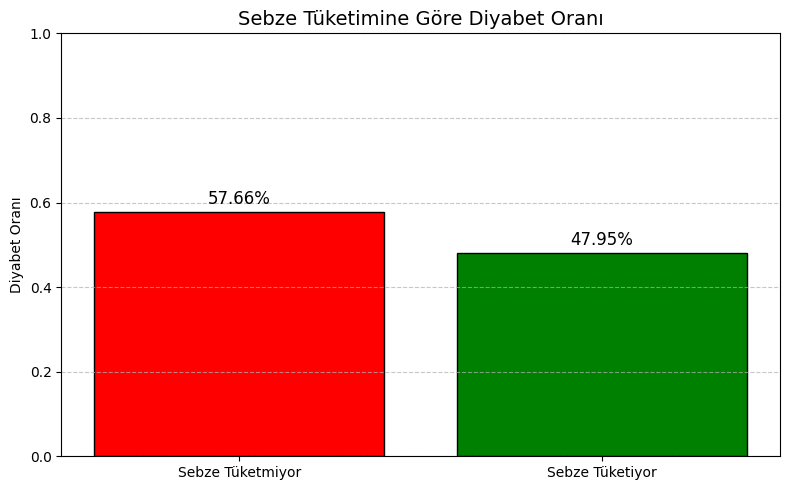

In [174]:
diabetes_no_veggie = len(df[(df['Veggies'] == 0) & (df['Diabetes'] == 1)])
total_no_veggie = len(df[df['Veggies'] == 0])

diabetes_yes_veggie = len(df[(df['Veggies'] == 1) & (df['Diabetes'] == 1)])
total_yes_veggie = len(df[df['Veggies'] == 1])

rate_no_veggie = diabetes_no_veggie / total_no_veggie if total_no_veggie != 0 else 0
rate_yes_veggie = diabetes_yes_veggie / total_yes_veggie if total_yes_veggie != 0 else 0

# Grafik verileri
labels = ['Sebze Tüketmiyor', 'Sebze Tüketiyor']
rates = [rate_no_veggie, rate_yes_veggie]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['red', 'green'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Sebze Tüketimine Göre Diyabet Oranı', fontsize=14)
plt.ylabel('Diyabet Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.15 Sebze,Meyve ve Diyabet Arasındaki Korelasyon

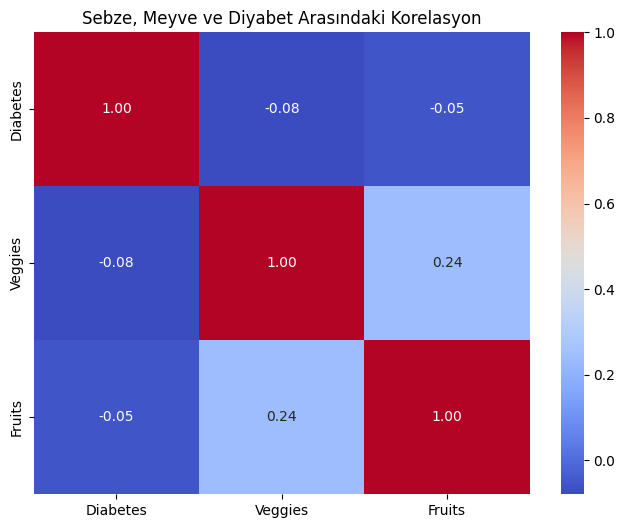

In [175]:
# Diyabet, sebze ve meyve tüketimi arasındaki ilişkiyi keşfetmek için bir korelasyon matrisi oluştur
correlation_diabetes_veg_fruit = df[['Diabetes', 'Veggies', 'Fruits']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_diabetes_veg_fruit, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Sebze, Meyve ve Diyabet Arasındaki Korelasyon')
plt.show()

### 5.16 Meyve ve Sebze Tüketimini Tek Değişkende Birleşimi

In [176]:
# Fruits ve Veggies sütunlarını boolean değerlere dönüştür
df['Fruits'] = df['Fruits'].astype(bool) 
df['Veggies'] = df['Veggies'].astype(bool)

# Fruits veya Veggies sütunlarından herhangi biri True ise, True olacak yeni bir Fruit_Veggie_Consumption sütunu oluştur
df['Fruit_Veggie_Consumption'] = (df['Fruits'] | df['Veggies']).astype('float')

# Artık gereksiz olan Fruits ve Veggies sütunlarını kaldır
df = df.drop(['Fruits', 'Veggies'], axis=1)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       70692 non-null  category
 1   Sex                       70692 non-null  category
 2   HighChol                  70692 non-null  category
 3   CholCheck                 70692 non-null  category
 4   BMI                       70692 non-null  int64   
 5   Smoker                    70692 non-null  category
 6   HeartDiseaseorAttack      70692 non-null  category
 7   PhysActivity              70692 non-null  category
 8   HvyAlcoholConsump         70692 non-null  category
 9   GenHlth                   70692 non-null  category
 10  DiffWalk                  70692 non-null  category
 11  Stroke                    70692 non-null  category
 12  HighBP                    70692 non-null  category
 13  Diabetes                  70692 non-null  cate

In [177]:
df['Fruit_Veggie_Consumption'] = df['Fruit_Veggie_Consumption'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       70692 non-null  category
 1   Sex                       70692 non-null  category
 2   HighChol                  70692 non-null  category
 3   CholCheck                 70692 non-null  category
 4   BMI                       70692 non-null  int64   
 5   Smoker                    70692 non-null  category
 6   HeartDiseaseorAttack      70692 non-null  category
 7   PhysActivity              70692 non-null  category
 8   HvyAlcoholConsump         70692 non-null  category
 9   GenHlth                   70692 non-null  category
 10  DiffWalk                  70692 non-null  category
 11  Stroke                    70692 non-null  category
 12  HighBP                    70692 non-null  category
 13  Diabetes                  70692 non-null  cate

In [178]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,DiffWalk,Stroke,HighBP,Diabetes,Fruit_Veggie_Consumption
0,4.0,1.0,0.0,1.0,2,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0
1,12.0,1.0,1.0,1.0,2,1.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0
2,13.0,1.0,0.0,1.0,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,11.0,1.0,1.0,1.0,2,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0
4,8.0,0.0,0.0,1.0,2,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0


In [179]:
df['BMI'] = df['BMI'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       70692 non-null  category
 1   Sex                       70692 non-null  category
 2   HighChol                  70692 non-null  category
 3   CholCheck                 70692 non-null  category
 4   BMI                       70692 non-null  category
 5   Smoker                    70692 non-null  category
 6   HeartDiseaseorAttack      70692 non-null  category
 7   PhysActivity              70692 non-null  category
 8   HvyAlcoholConsump         70692 non-null  category
 9   GenHlth                   70692 non-null  category
 10  DiffWalk                  70692 non-null  category
 11  Stroke                    70692 non-null  category
 12  HighBP                    70692 non-null  category
 13  Diabetes                  70692 non-null  cate

#  6. Diyabet Hastalarında Değişkenler Arası Korelasyon Analizi

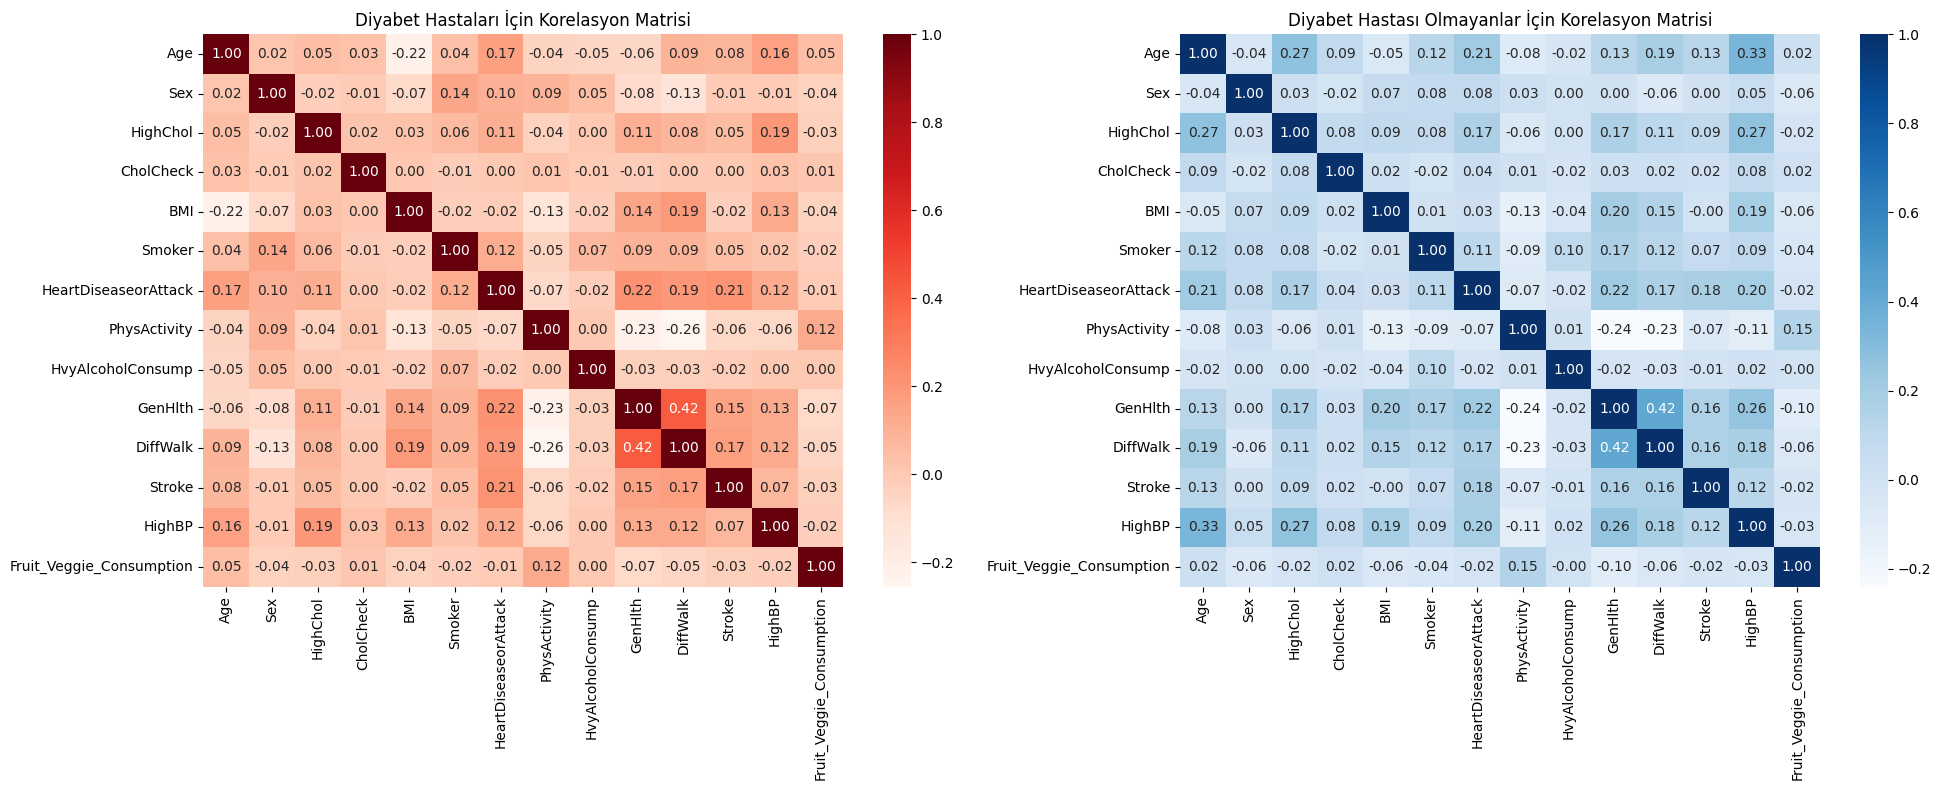

In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Diyabet hastaları ---
df_diab = df[df['Diabetes'] == 1].copy()
for col in df_diab.select_dtypes(include='category').columns:
    df_diab[col] = df_diab[col].cat.codes
corr_diab = df_diab.drop(columns=['Diabetes']).corr()

# --- 2. Diyabet hastası olmayanlar ---
df_nondiab = df[df['Diabetes'] == 0].copy()
for col in df_nondiab.select_dtypes(include='category').columns:
    df_nondiab[col] = df_nondiab[col].cat.codes
corr_nondiab = df_nondiab.drop(columns=['Diabetes']).corr()

# --- 3. Yan yana heatmap görselleştirme ---
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(corr_diab, annot=True, fmt=".2f", cmap="Reds", ax=axes[0])
axes[0].set_title("Diyabet Hastaları İçin Korelasyon Matrisi")

sns.heatmap(corr_nondiab, annot=True, fmt=".2f", cmap="Blues", ax=axes[1])
axes[1].set_title("Diyabet Hastası Olmayanlar İçin Korelasyon Matrisi")

plt.tight_layout()
plt.show()


# 7. Diyabet ve Diğer Değişkenler Arasındaki Korelasyon

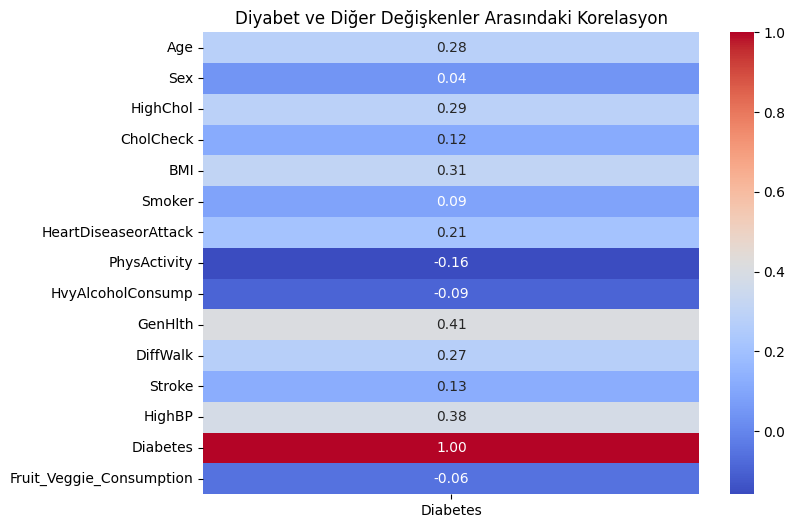

In [182]:
# Diyabet ile diğer tüm değişkenler arasındaki korelasyonu görselleştirmek için bir ısı haritası oluştur
correlation_matrix = df.corr() 
diabetes_related_corr = correlation_matrix[['Diabetes']]

plt.figure(figsize=(8, 6))
sns.heatmap(diabetes_related_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Diyabet ve Diğer Değişkenler Arasındaki Korelasyon')
plt.show()

# 8. Model Seçimi ve Hiperparametre Ayarlaması (GridSearchCV)

Fitting 5 folds for each of 61 candidates, totalling 305 fits
En iyi parametreler: {'classifier': GradientBoostingClassifier(random_state=42), 'classifier__learning_rate': 0.2, 'classifier__n_estimators': 100}
En iyi F1 skoru: 0.7620


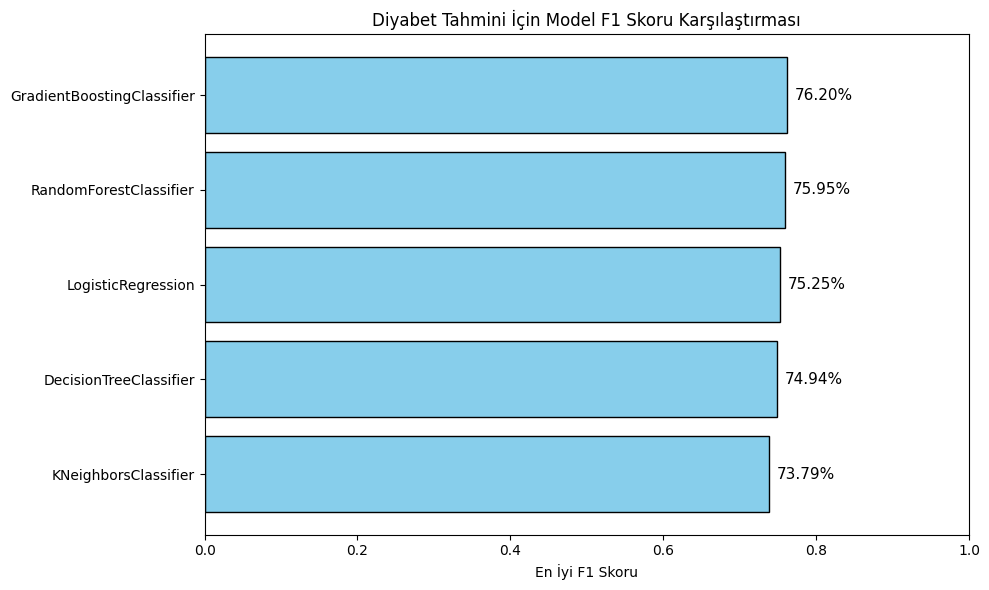

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Veriyi ayır
X = df.drop(['Diabetes'], axis=1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Parametre ızgarası
param_grid = [
    {
        'classifier': [LogisticRegression(max_iter=1000, solver='liblinear')],
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2']
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7, 9]
    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2]
    },
    {
        'classifier': [DecisionTreeClassifier(random_state=42)],
        'classifier__max_depth': [None, 5, 10],
        'classifier__min_samples_split': [2, 5]
    },
    {
        'classifier': [GradientBoostingClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    }
]

# KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=cv, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

print(f"En iyi parametreler: {grid_search.best_params_}")
print(f"En iyi F1 skoru: {grid_search.best_score_:.4f}")

# En iyi F1 skorlarını topla
results = pd.DataFrame(grid_search.cv_results_)
model_scores = []

for model in results['param_classifier'].unique():
    model_name = model.__class__.__name__
    best_f1 = results[results['param_classifier'] == model]['mean_test_score'].max()
    model_scores.append((model_name, best_f1))

# Sırala ve DataFrame'e dönüştür
model_scores_sorted = sorted(model_scores, key=lambda x: x[1], reverse=True)
df_scores = pd.DataFrame(model_scores_sorted, columns=["Model", "Best F1 Score"])

# Grafik çizimi
plt.figure(figsize=(10, 6))
bars = plt.barh(df_scores["Model"], df_scores["Best F1 Score"], color='skyblue', edgecolor='black')
plt.xlabel("En İyi F1 Skoru")
plt.title("Diyabet Tahmini İçin Model F1 Skoru Karşılaştırması")
plt.xlim(0, 1)

# Yüzdelik etiketler
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f"{width:.2%}", va='center', fontsize=11)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# 9. Özellik Önem Dereceleri – Gradient Boosting Modeli

En iyi model Gradient Boosting Sınıflandırıcısı olduğundan, hangi özelliklerin diyabetin tahmin edilmesine en çok katkıda bulunduğunu anlamak için kullanılır.

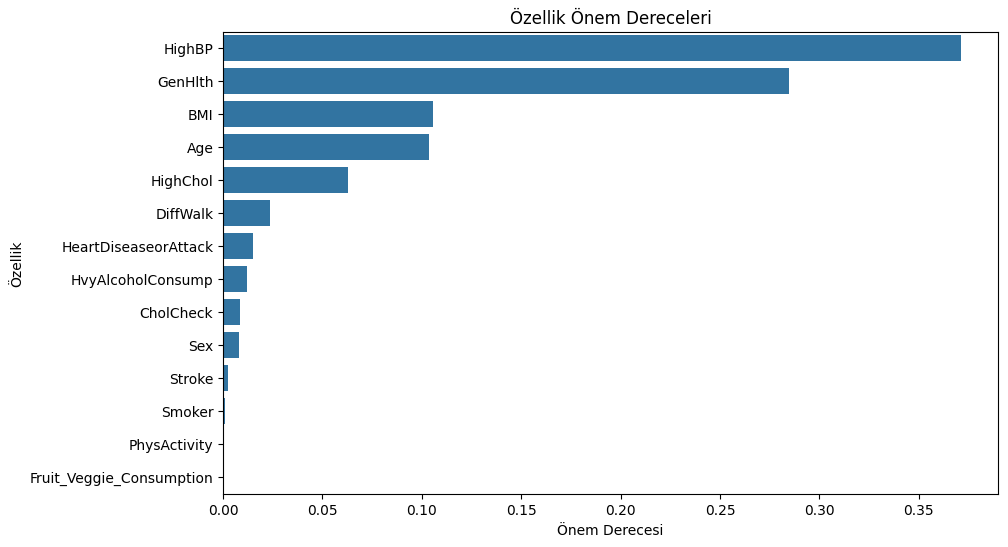

In [184]:
# Gradient Boosting Classifier modelini eğit
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2)
model.fit(X_train, y_train)

# Modelden özellik önemlerini al
importances = model.feature_importances_  
feature_importances = pd.DataFrame({'Özellik': X.columns, 'Önem Derecesi': importances})  
sorted_feature_importances = feature_importances.sort_values(by='Önem Derecesi', ascending=False)

# Özellik önemlerini görselleştir
plt.figure(figsize=(10, 6))  
sns.barplot(x='Önem Derecesi', y='Özellik', data=sorted_feature_importances)  
plt.title('Özellik Önem Dereceleri')  
plt.show()

### 10. Modelin Doğruluk Skorunun Hesaplanması

In [185]:
# Modelin tahmin ettiği değerleri gerçek test etiketleriyle karşılaştırarak doğruluğunu hesapla
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Modelin doğruluğu şu şekilde hesaplandı: {accuracy:.4f}")

Modelin doğruluğu şu şekilde hesaplandı: 0.7527


# 📈 17. Modelin Performans Değerlendirme Raporu – Sınıflandırma Metrikleri

In [186]:
# Modelin performansını değerlendirmek için detaylı bir sınıflandırma raporu yazdır
print("Modelin performans değerlendirme raporu:")
print(classification_report(y_test, y_pred))

Modelin performans değerlendirme raporu:
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7090
         1.0       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139



# 11. Karmaşıklık Matrisi (Confusion Matrix) – Modelin Hata Analizi

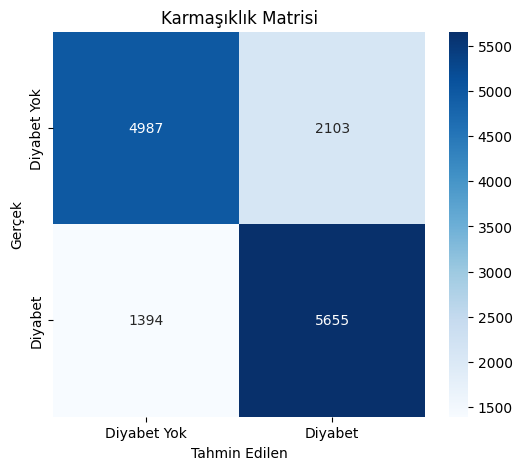

In [187]:
# Modelin performansını değerlendirmek için gerçek ve tahmin edilen değerleri gösteren bir karmaşıklık matrisi oluştur
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Diyabet Yok', 'Diyabet'], 
            yticklabels=['Diyabet Yok', 'Diyabet'])

plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karmaşıklık Matrisi')
plt.show()

# 12. Modelin Kaydedilmesi – joblib ile .pkl Formatında

In [188]:
import joblib  # Modeli kaydetmek ve yüklemek için
joblib.dump(model, "diabetes_model_son_deneme.pkl")

['diabetes_model_son_deneme.pkl']

In [189]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,DiffWalk,Stroke,HighBP,Diabetes,Fruit_Veggie_Consumption
0,4.0,1.0,0.0,1.0,2,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0
1,12.0,1.0,1.0,1.0,2,1.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0
2,13.0,1.0,0.0,1.0,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,11.0,1.0,1.0,1.0,2,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0
4,8.0,0.0,0.0,1.0,2,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0


In [190]:
# Model eğitilirken kullanılan sütun sırası
feature_order = X.columns.tolist()

print("Modele veri verirken kullanılacak doğru sıra:")
for i, col in enumerate(feature_order):
    print(f"{i+1}. {col}")


Modele veri verirken kullanılacak doğru sıra:
1. Age
2. Sex
3. HighChol
4. CholCheck
5. BMI
6. Smoker
7. HeartDiseaseorAttack
8. PhysActivity
9. HvyAlcoholConsump
10. GenHlth
11. DiffWalk
12. Stroke
13. HighBP
14. Fruit_Veggie_Consumption
